# **Importing the important libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

# TRAIN DATASET.

# **Converting the dataset into time series dataset**

In [2]:
stock_market_train = pd.read_excel('Stock Market.xlsx',sheet_name='Train',index_col='Date',squeeze=True,parse_dates=['Date'])

# **Looking at the data**

In [3]:
stock_market_train.head()

Stock 1  Stock 2  Stock 3  Stock 4
Date                                          
2010-07-21    23.94   312.22   144.64   503.74
2010-07-22    24.48   319.24   146.88   518.08
2010-07-23    25.50   335.50   155.00   540.50
2010-07-26    26.59   349.67   162.54   563.39
2010-07-27    25.51   332.63   156.06   537.71

# **Fixing the column names**

In [4]:
stock_market_train.columns = stock_market_train.columns.str.replace(' ', '_')

# **Checking for the changes**

In [5]:
stock_market_train.head()

Stock_1  Stock_2  Stock_3  Stock_4
Date                                          
2010-07-21    23.94   312.22   144.64   503.74
2010-07-22    24.48   319.24   146.88   518.08
2010-07-23    25.50   335.50   155.00   540.50
2010-07-26    26.59   349.67   162.54   563.39
2010-07-27    25.51   332.63   156.06   537.71

In [6]:
stock_market_train.tail()

Stock_1  Stock_2  Stock_3  Stock_4
Date                                          
2017-09-25    55.06   716.78   331.36  1157.26
2017-09-26    56.16   735.08   338.96  1183.36
2017-09-27    56.71   739.23   344.26  1190.91
2017-09-28    56.02   728.26   338.12  1180.42
2017-09-29    56.60   738.80   343.60  1191.60

# **Plotting the dataset on the graph**

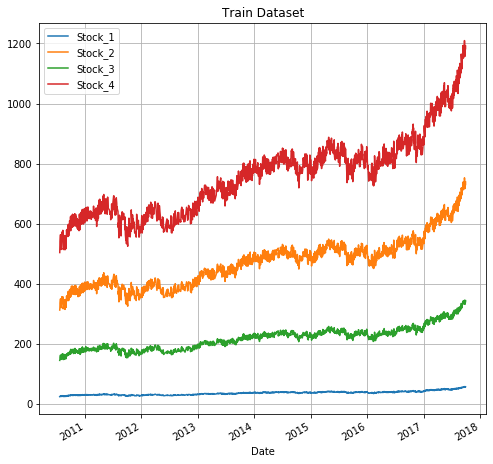

In [7]:
stock_market_train.plot(title='Train Dataset',figsize=(8,8));
plt.grid()

Text(0.5, 1.0, 'Stock_1 price action')

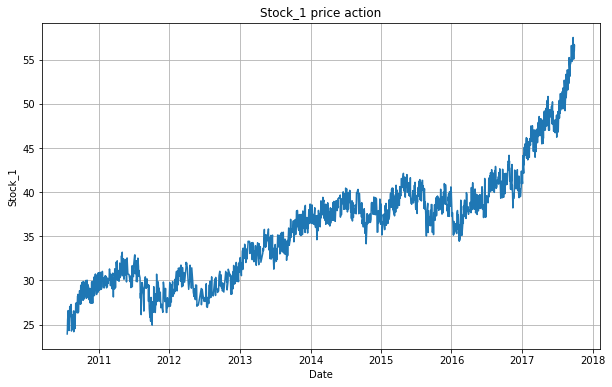

In [8]:
stock_graph = stock_market_train['Stock_1']

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(stock_graph)
plt.xlabel('Date')
plt.ylabel('Stock_1')
plt.title('Stock_1 price action')

Text(0.5, 1.0, 'Stock_2 price action')

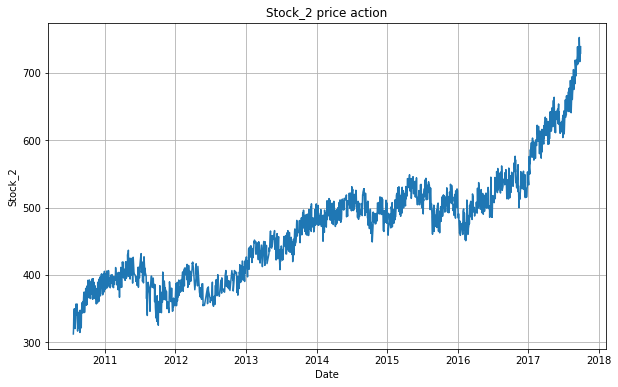

In [9]:
stock_graph = stock_market_train['Stock_2']

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(stock_graph)
plt.xlabel('Date')
plt.ylabel('Stock_2')
plt.title('Stock_2 price action')

Text(0.5, 1.0, 'Stock_3 price action')

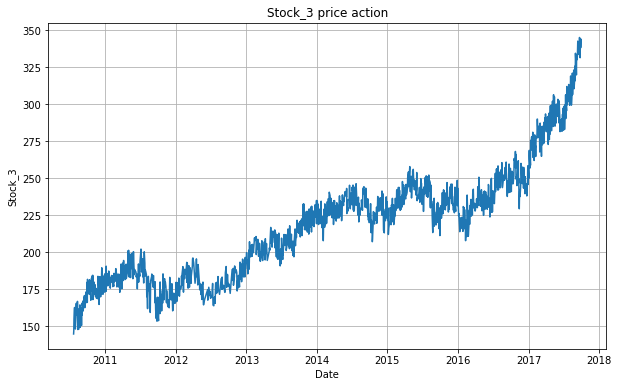

In [10]:
stock_graph = stock_market_train['Stock_3']

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(stock_graph)
plt.xlabel('Date')
plt.ylabel('Stock_3')
plt.title('Stock_3 price action')

Text(0.5, 1.0, 'Stock_4 price action')

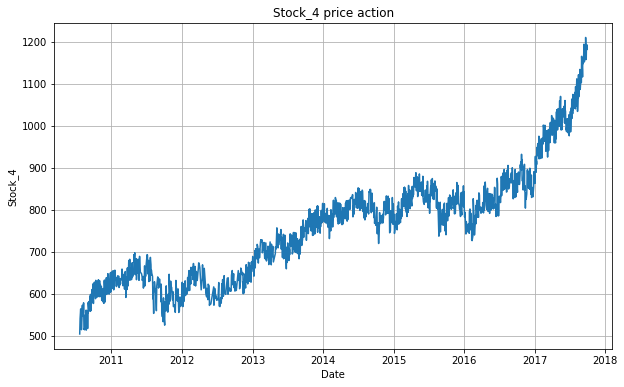

In [11]:
stock_graph = stock_market_train['Stock_4']

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(stock_graph)
plt.xlabel('Date')
plt.ylabel('Stock_4')
plt.title('Stock_4 price action')

# **Looking at the shape of the data**

In [12]:
stock_market_train.shape

(1535, 4)

# **Getting the information about the data**

In [13]:
stock_market_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1535 entries, 2010-07-21 to 2017-09-29
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Stock_1  1535 non-null   float64
 1   Stock_2  1535 non-null   float64
 2   Stock_3  1535 non-null   float64
 3   Stock_4  1535 non-null   float64
dtypes: float64(4)
memory usage: 60.0 KB


# **Checking for the Summary** 

In [14]:
stock_market_train.describe().T

count        mean         std     min      25%     50%      75%  \
Stock_1  1535.0   36.538762    6.408853   23.94   30.745   37.11   39.795   
Stock_2  1535.0  477.549186   83.333790  312.22  403.510  484.51  520.050   
Stock_3  1535.0  221.768730   38.555687  144.64  187.230  224.82  241.600   
Stock_4  1535.0  769.890554  134.576279  503.74  649.490  781.47  837.985   

             max  
Stock_1    57.51  
Stock_2   752.63  
Stock_3   345.06  
Stock_4  1209.71

# **Checking for null values**

In [15]:
stock_market_train.isnull().sum()

Stock_1    0
Stock_2    0
Stock_3    0
Stock_4    0
dtype: int64

# Data Visualisation

**Univariate Analysis**


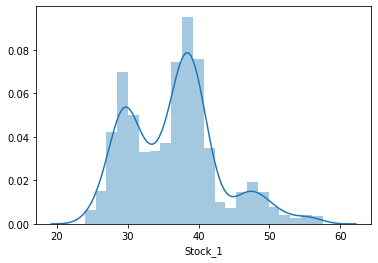

In [16]:
sns.distplot(
    stock_market_train['Stock_1'],
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
)

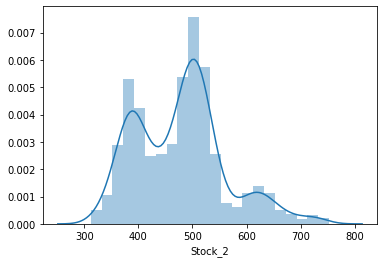

In [17]:
sns.distplot(
    stock_market_train['Stock_2'],
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
)

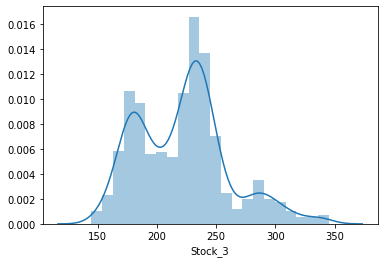

In [18]:
sns.distplot(
    stock_market_train['Stock_3'],
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
)

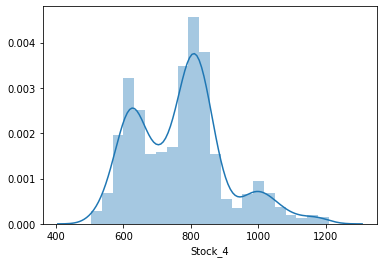

In [19]:
sns.distplot(
    stock_market_train['Stock_4'],
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
)

**Bivariate Analysis**

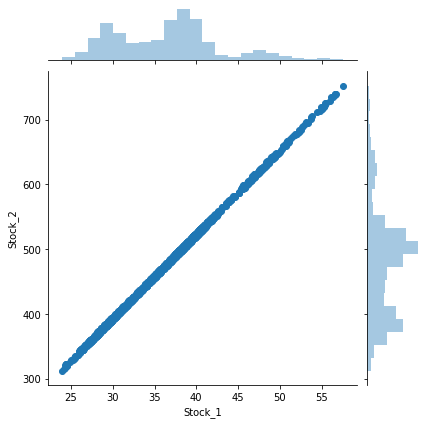

In [20]:
sns.jointplot('Stock_1','Stock_2',data=stock_market_train)


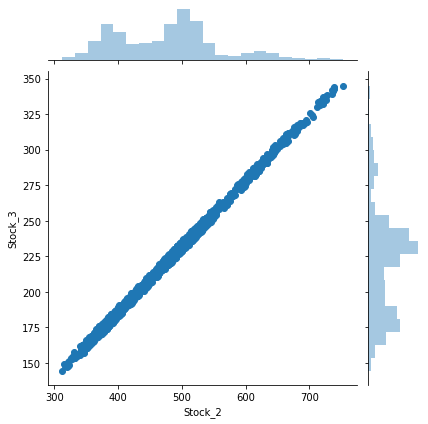

In [21]:
sns.jointplot('Stock_2','Stock_3',data=stock_market_train)

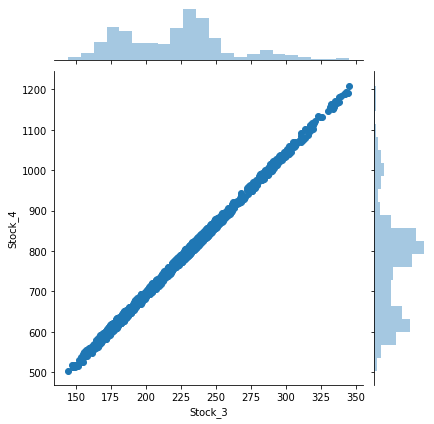

In [22]:
sns.jointplot('Stock_3','Stock_4',data=stock_market_train)

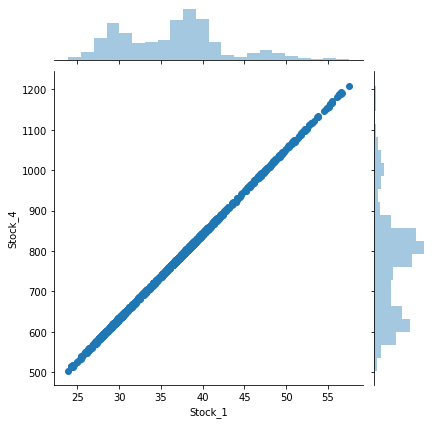

In [23]:
sns.jointplot('Stock_1','Stock_4',data=stock_market_train)

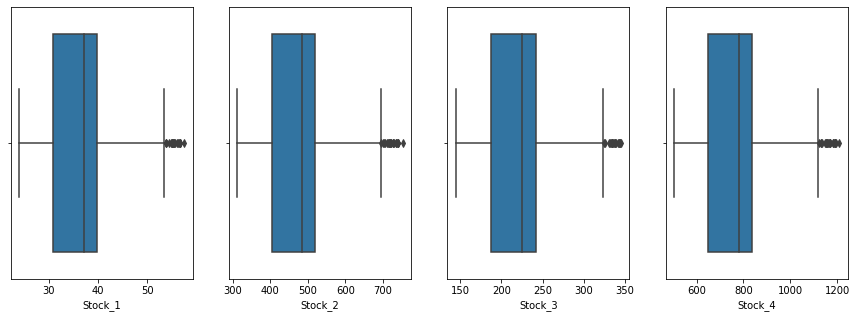

In [24]:
#BOXPLOTS

fig, axs = plt.subplots(1,4, figsize = (15,5))

sns.boxplot(stock_market_train['Stock_1'], ax = axs[0])
sns.boxplot(stock_market_train['Stock_2'], ax = axs[1])
sns.boxplot(stock_market_train['Stock_3'], ax = axs[2])
sns.boxplot(stock_market_train['Stock_4'], ax = axs[3])

plt.tight_layout
plt.show()

**Multivariate Analysis**

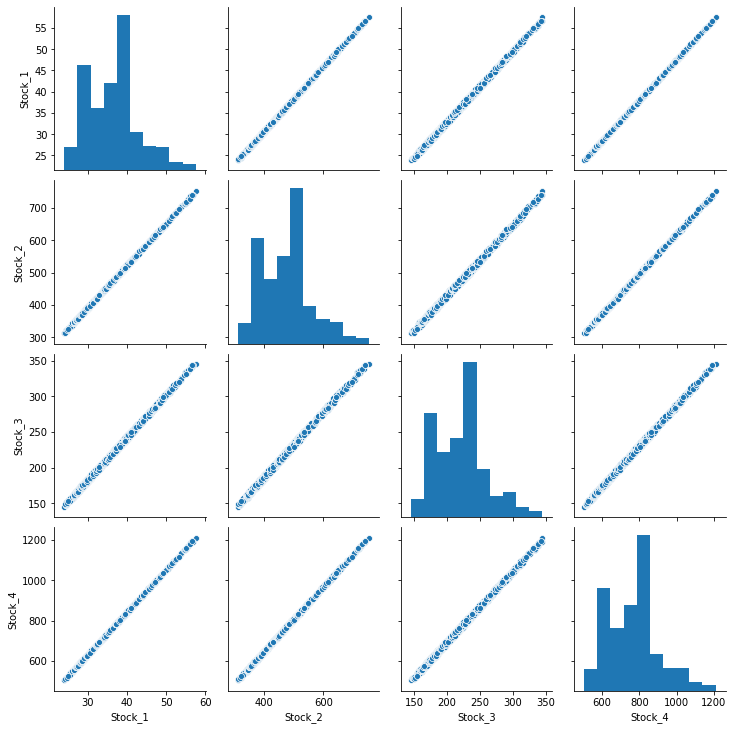

In [25]:
sns.pairplot(stock_market_train)

# Upsampling 

**As we all know that the stock market is open for only 5 days a week,Saturday and Sunday are off or holiday and also the ocassional holidays too need to be considered, here we perform 'UPSAMPLING' process to the data. As the value of the stock remains unchanged during holidays those will be carry forward till opening of the market.**

In [26]:
df1_d = stock_market_train.resample('D').ffill()

In [27]:
df1_d['2010-07']

Stock_1  Stock_2  Stock_3  Stock_4
Date                                          
2010-07-21    23.94   312.22   144.64   503.74
2010-07-22    24.48   319.24   146.88   518.08
2010-07-23    25.50   335.50   155.00   540.50
2010-07-24    25.50   335.50   155.00   540.50
2010-07-25    25.50   335.50   155.00   540.50
2010-07-26    26.59   349.67   162.54   563.39
2010-07-27    25.51   332.63   156.06   537.71
2010-07-28    24.43   322.59   148.58   517.03
2010-07-29    25.25   328.25   152.50   530.25
2010-07-30    24.33   320.29   147.98   513.93
2010-07-31    24.33   320.29   147.98   513.93

# Plotting for the data above

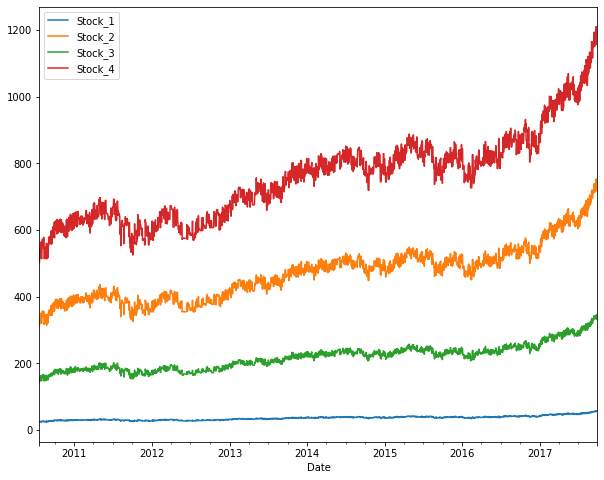

In [28]:
 df1_d.plot(figsize=(10,8))

# Checking for the shape 

In [29]:
df1_d.shape

(2628, 4)

# Looking at the information 

In [30]:
df1_d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2628 entries, 2010-07-21 to 2017-09-29
Freq: D
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Stock_1  2628 non-null   float64
 1   Stock_2  2628 non-null   float64
 2   Stock_3  2628 non-null   float64
 3   Stock_4  2628 non-null   float64
dtypes: float64(4)
memory usage: 102.7 KB


# Checking for the null values

In [31]:
df1_d.isnull().sum()

Stock_1    0
Stock_2    0
Stock_3    0
Stock_4    0
dtype: int64

# Checking for the top summary 

In [32]:
df1_d.describe()

Stock_1      Stock_2      Stock_3      Stock_4
count  2628.000000  2628.000000  2628.000000  2628.000000
mean     35.880567   468.991130   217.829064   756.089319
std       6.269942    81.525056    37.666324   131.588387
min      23.940000   312.220000   144.640000   503.740000
25%      30.360000   396.200000   183.815000   639.560000
50%      36.430000   475.670000   220.480000   767.240000
75%      39.430000   514.810000   238.665000   830.290000
max      57.510000   752.630000   345.060000  1209.710000

Text(0.5, 1.0, 'Stock_1 price action')

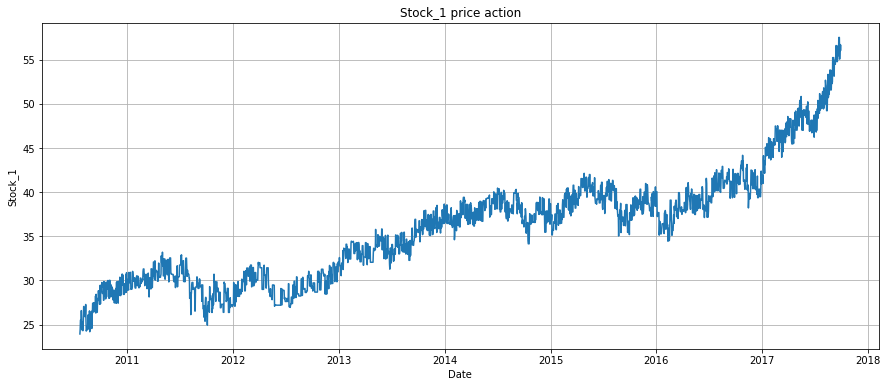

In [33]:
stock_Graph = df1_d['Stock_1']

plt.figure(figsize=(15,6))
plt.grid()
plt.plot(stock_Graph)
plt.xlabel('Date')
plt.ylabel('Stock_1')
plt.title('Stock_1 price action')

Text(0.5, 1.0, 'Stock_2 price action')

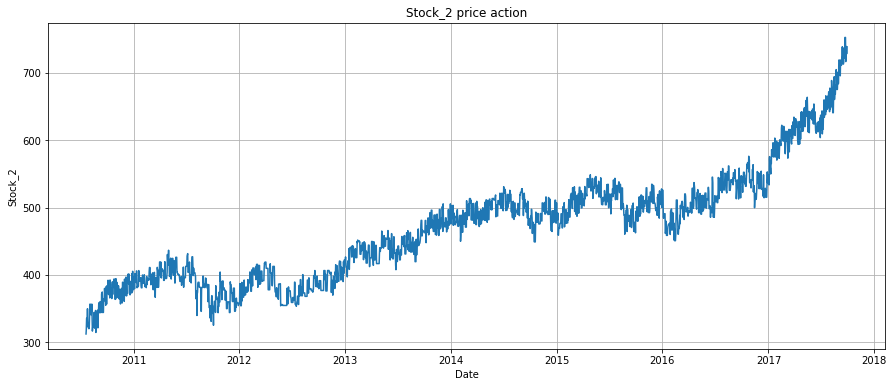

In [34]:
stock_Graph = df1_d['Stock_2']

plt.figure(figsize=(15,6))
plt.grid()
plt.plot(stock_Graph)
plt.xlabel('Date')
plt.ylabel('Stock_2')
plt.title('Stock_2 price action')

Text(0.5, 1.0, 'Stock_3 price action')

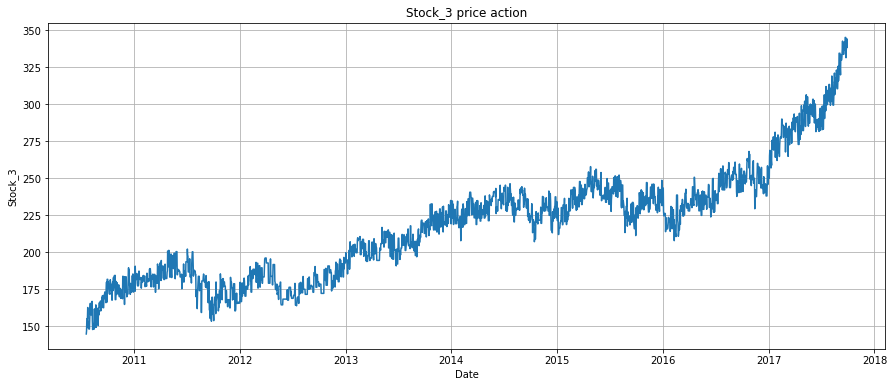

In [35]:
stock_Graph = df1_d['Stock_3']

plt.figure(figsize=(15,6))
plt.grid()
plt.plot(stock_Graph)
plt.xlabel('Date')
plt.ylabel('Stock_3')
plt.title('Stock_3 price action')

Text(0.5, 1.0, 'Stock_4 price action')

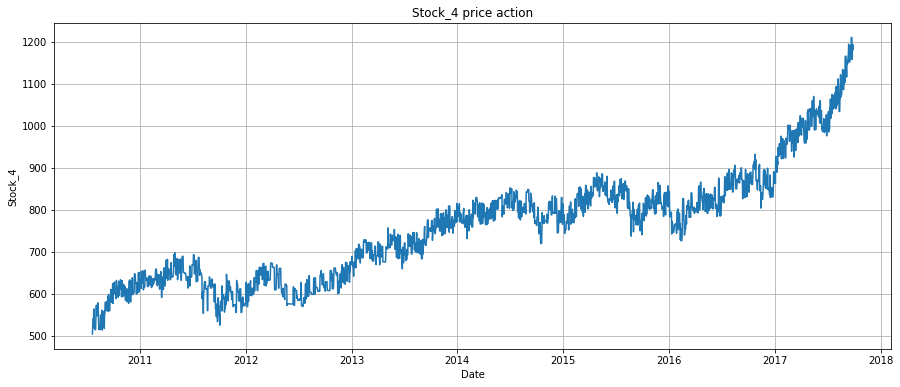

In [36]:
stock_Graph = df1_d['Stock_4']

plt.figure(figsize=(15,6))
plt.grid()
plt.plot(stock_Graph)
plt.xlabel('Date')
plt.ylabel('Stock_4')
plt.title('Stock_4 price action')

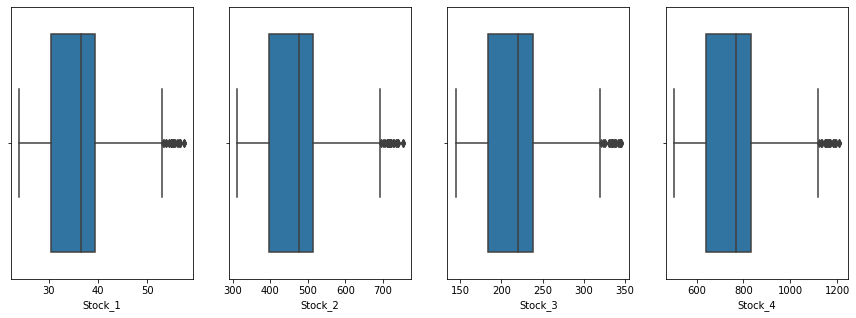

In [37]:
#BOXPLOTS

fig, axs = plt.subplots(1,4, figsize = (15,5))

sns.boxplot(df1_d['Stock_1'], ax = axs[0])
sns.boxplot(df1_d['Stock_2'], ax = axs[1])
sns.boxplot(df1_d['Stock_3'], ax = axs[2])
sns.boxplot(df1_d['Stock_4'], ax = axs[3])

plt.tight_layout
plt.show()

# TEST DATASET.

# Converting the dataset into time series dataset

In [38]:
stock_market_test = pd.read_excel('Stock Market.xlsx',sheet_name='Test',index_col='Date',squeeze=True,parse_dates=['Date'])

# Looking at the data

In [39]:
stock_market_test.head()

Stock 1  Stock 2  Stock 3  Stock 4
Date                                          
2017-10-02    56.75   738.75   345.50  1195.75
2017-10-03    58.53   760.89   355.18  1230.13
2017-10-04    56.57   739.41   339.42  1189.97
2017-10-05    57.59   748.67   350.54  1209.39
2017-10-06    57.71   753.23   346.26  1215.91

# Fixing the column names

In [40]:
stock_market_test.columns = stock_market_test.columns.str.replace(' ', '_')

In [41]:
stock_market_test.head()

Stock_1  Stock_2  Stock_3  Stock_4
Date                                          
2017-10-02    56.75   738.75   345.50  1195.75
2017-10-03    58.53   760.89   355.18  1230.13
2017-10-04    56.57   739.41   339.42  1189.97
2017-10-05    57.59   748.67   350.54  1209.39
2017-10-06    57.71   753.23   346.26  1215.91

In [42]:
stock_market_test.tail()

Stock_1  Stock_2  Stock_3  Stock_4
Date                                          
2017-10-25    59.80   780.40   362.80  1257.80
2017-10-26    58.05   754.65   353.30  1220.05
2017-10-27    58.19   758.47   352.14  1224.99
2017-10-30    58.13   756.69   353.78  1220.73
2017-10-31    57.50   752.50   348.00  1209.50

# Plotting the dataset on the graph

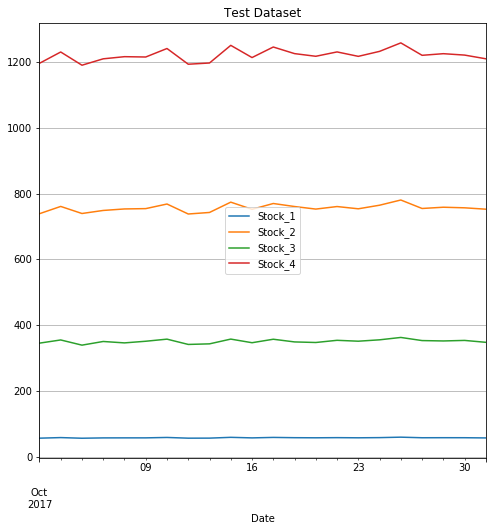

In [43]:
stock_market_test.plot(title='Test Dataset',figsize=(8,8));
plt.grid()

# Looking at the shape of the data

In [44]:
stock_market_test.shape

(22, 4)

# Getting the information about the data

In [45]:
stock_market_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2017-10-02 to 2017-10-31
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Stock_1  22 non-null     float64
 1   Stock_2  22 non-null     float64
 2   Stock_3  22 non-null     float64
 3   Stock_4  22 non-null     float64
dtypes: float64(4)
memory usage: 880.0 bytes


# Checking for the Summary

In [46]:
stock_market_test.describe().T

count         mean        std      min        25%      50%  \
Stock_1   22.0    57.995455   0.837768    56.57    57.6000    57.98   
Stock_2   22.0   756.122727  11.107156   737.88   752.2675   754.44   
Stock_3   22.0   350.927273   5.814195   339.42   346.9500   351.33   
Stock_4   22.0  1220.450000  18.141324  1189.97  1210.4325  1218.58   

               75%     max  
Stock_1    58.4100    59.8  
Stock_2   760.8175   780.4  
Stock_3   354.9100   362.8  
Stock_4  1230.2950  1257.8

# Checking for null values

In [47]:
stock_market_test.isnull().sum()

Stock_1    0
Stock_2    0
Stock_3    0
Stock_4    0
dtype: int64

# Data Visualisation

**Plotting the graphs seperately.**

Text(0.5, 1.0, 'Stock_1 price action')

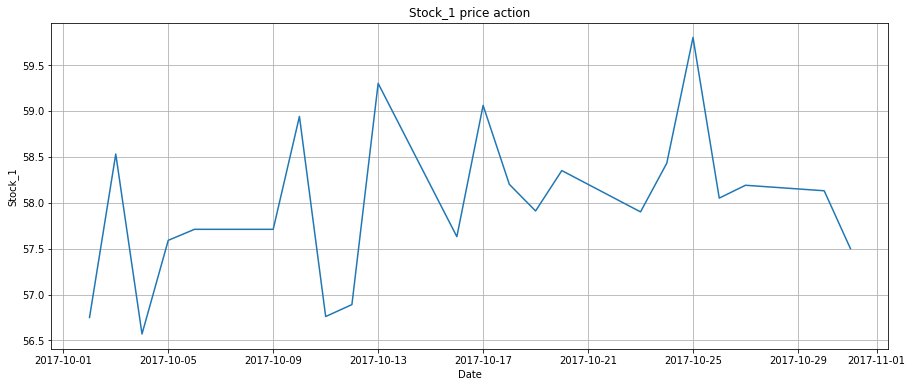

In [48]:
stock_graph = stock_market_test['Stock_1']

plt.figure(figsize=(15,6))
plt.grid()
plt.plot(stock_graph)
plt.xlabel('Date')
plt.ylabel('Stock_1')
plt.title('Stock_1 price action')

Text(0.5, 1.0, 'Stock_2 price action')

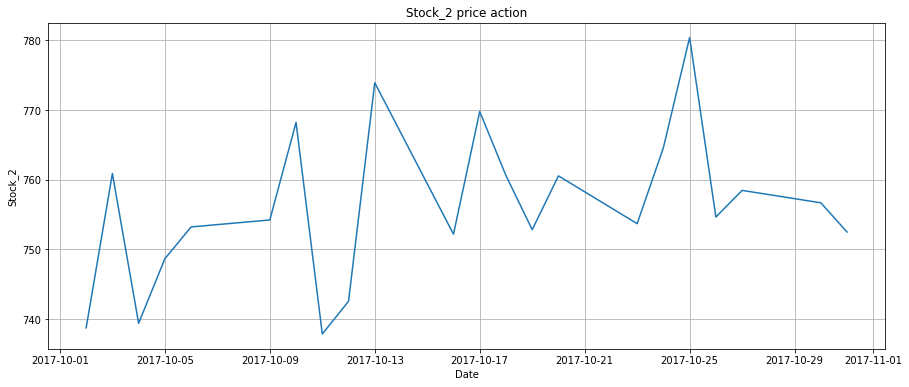

In [49]:
stock_graph = stock_market_test['Stock_2']

plt.figure(figsize=(15,6))
plt.grid()
plt.plot(stock_graph)
plt.xlabel('Date')
plt.ylabel('Stock_2')
plt.title('Stock_2 price action')

Text(0.5, 1.0, 'Stock_3 price action')

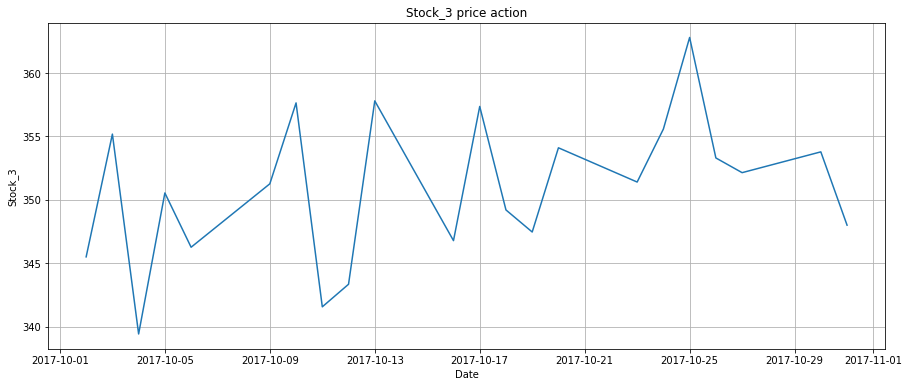

In [50]:
stock_graph = stock_market_test['Stock_3']

plt.figure(figsize=(15,6))
plt.grid()
plt.plot(stock_graph)
plt.xlabel('Date')
plt.ylabel('Stock_3')
plt.title('Stock_3 price action')

Text(0.5, 1.0, 'Stock_4 price action')

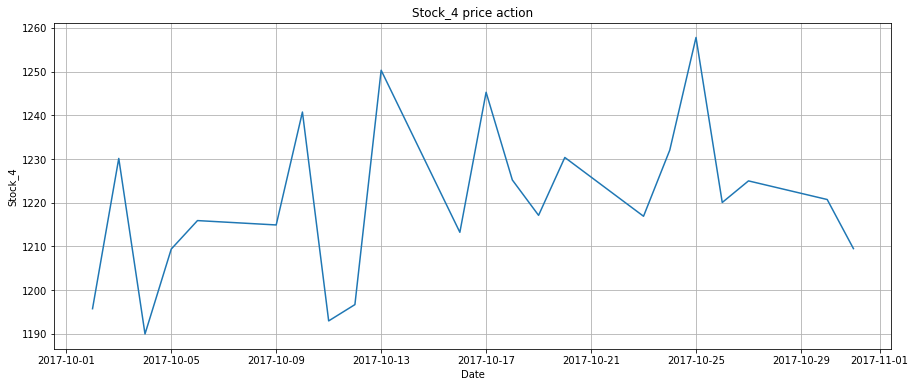

In [51]:
stock_graph = stock_market_test['Stock_4']

plt.figure(figsize=(15,6))
plt.grid()
plt.plot(stock_graph)
plt.xlabel('Date')
plt.ylabel('Stock_4')
plt.title('Stock_4 price action')

**Univariate Analysis**

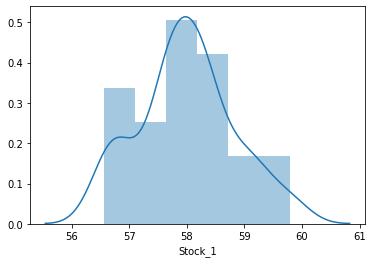

In [52]:
sns.distplot(stock_market_test['Stock_1'])

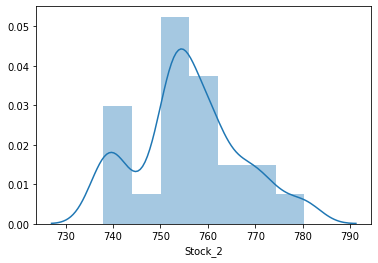

In [53]:
sns.distplot(stock_market_test['Stock_2'])

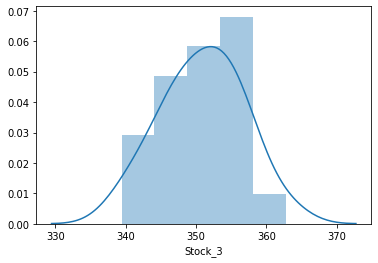

In [54]:
sns.distplot(stock_market_test['Stock_3'])

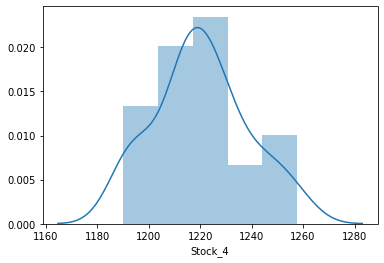

In [55]:
sns.distplot(stock_market_test['Stock_4'])

**Bivariate Analysis**

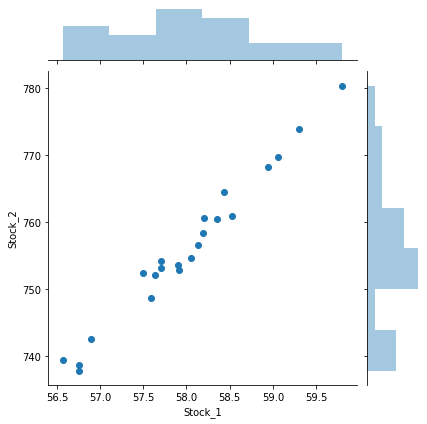

In [56]:
sns.jointplot('Stock_1','Stock_2',data=stock_market_test)

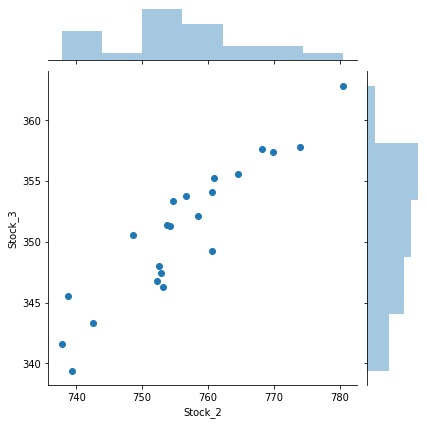

In [57]:
sns.jointplot('Stock_2','Stock_3',data=stock_market_test)

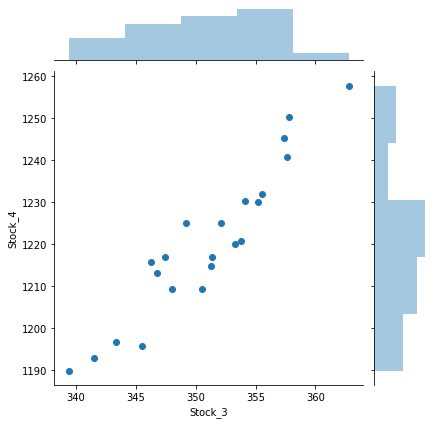

In [58]:
sns.jointplot('Stock_3','Stock_4',data=stock_market_test)

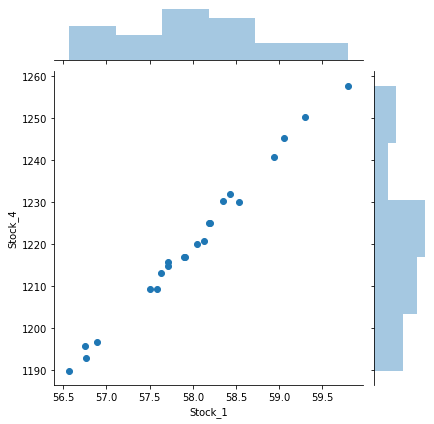

In [59]:
sns.jointplot('Stock_1','Stock_4',data=stock_market_test)

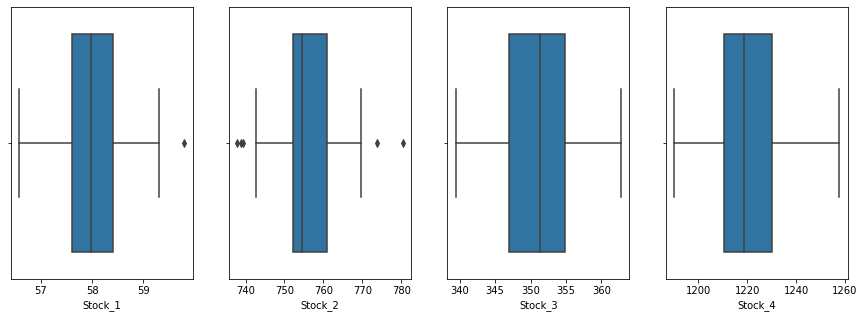

In [60]:
#BOXPLOTS

fig, axs = plt.subplots(1,4, figsize = (15,5))

sns.boxplot(stock_market_test['Stock_1'], ax = axs[0])
sns.boxplot(stock_market_test['Stock_2'], ax = axs[1])
sns.boxplot(stock_market_test['Stock_3'], ax = axs[2])
sns.boxplot(stock_market_test['Stock_4'], ax = axs[3])

plt.tight_layout
plt.show()

**Multivariate Analysis**

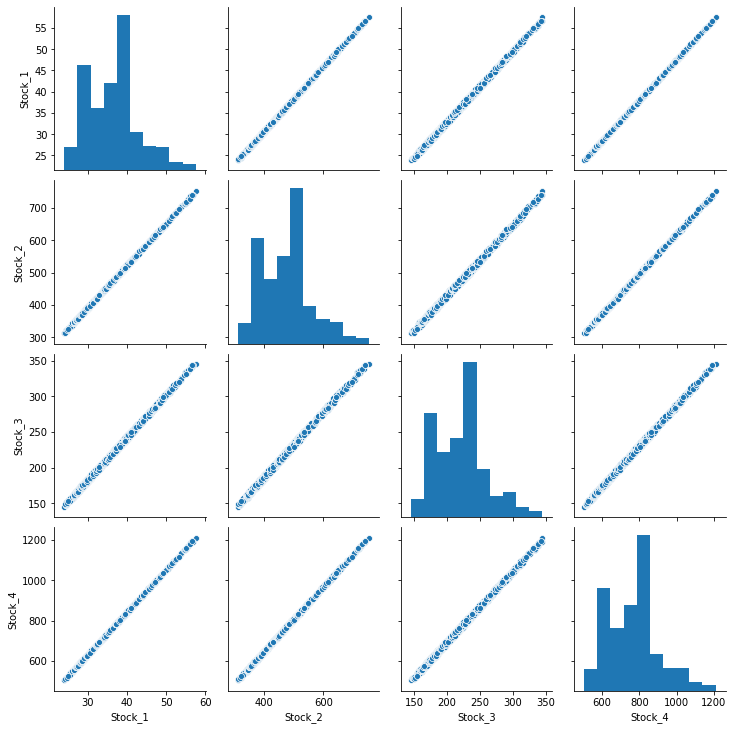

In [61]:
sns.pairplot(stock_market_train)

# Upsampling

**As we all know that the stock market is open for only 5 days a week,Saturday and Sunday are off or holiday and also the ocassional holidays too need to be considered, here we perform 'UPSAMPLING' process to the data. As the value of the stock remains unchanged during holidays those will be carry forward till opening of the market.**

In [62]:
df2_d = stock_market_test.resample('D').ffill()

In [63]:
df2_d['2017-10']

Stock_1  Stock_2  Stock_3  Stock_4
Date                                          
2017-10-02    56.75   738.75   345.50  1195.75
2017-10-03    58.53   760.89   355.18  1230.13
2017-10-04    56.57   739.41   339.42  1189.97
2017-10-05    57.59   748.67   350.54  1209.39
2017-10-06    57.71   753.23   346.26  1215.91
2017-10-07    57.71   753.23   346.26  1215.91
2017-10-08    57.71   753.23   346.26  1215.91
2017-10-09    57.71   754.23   351.26  1214.91
2017-10-10    58.94   768.22   357.64  1240.74
2017-10-11    56.76   737.88   341.56  1192.96
2017-10-12    56.89   742.57   343.34  1196.69
2017-10-13    59.30   773.90   357.80  1250.30
2017-10-14    59.30   773.90   357.80  1250.30
2017-10-15    59.30   773.90   357.80  1250.30
2017-10-16    57.63   752.19   346.78  1213.23
2017-10-17    59.06   769.78   357.36  1245.26
2017-10-18    58.20   760.60   349.20  1225.20
2017-10-19    57.91   752.83   347.46  1217.11
2017-10-20    58.35   760.55   354.10  1230.35
2017-10-21    58.35   760.55   354.10  1230.35
2017-10-22    58.35   760.55   354.10  1230.35
2017-10-23    57.90   753.70   351.40  1216.90
2017-10-24    58.43   764.59   355.58  1232.03
2017-10-25    59.80   780.40   362.80  1257.80
2017-10-26    58.05   754.65   353.30  1220.05
2017-10-27    58.19   758.47   352.14  1224.99
2017-10-28    58.19   758.47   352.14  1224.99
2017-10-29    58.19   758.47   352.14  1224.99
2017-10-30    58.13   756.69   353.78  1220.73
2017-10-31    57.50   752.50   348.00  1209.50

# Plotting the graph for above data

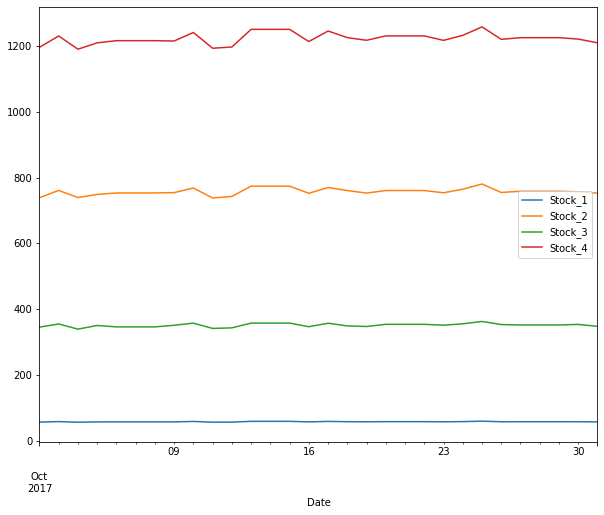

In [64]:
df2_d.plot(figsize=(10,8))

# Checking for the shape 

In [65]:
df2_d.shape

(30, 4)

# Checking for the information

In [66]:
df2_d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2017-10-02 to 2017-10-31
Freq: D
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Stock_1  30 non-null     float64
 1   Stock_2  30 non-null     float64
 2   Stock_3  30 non-null     float64
 3   Stock_4  30 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


# Checking for null values

In [67]:
df2_d.isnull().sum()

Stock_1    0
Stock_2    0
Stock_3    0
Stock_4    0
dtype: int64

# Checking for Top 5 Summary

In [68]:
df2_d.describe()

Stock_1     Stock_2     Stock_3      Stock_4
count  30.000000   30.000000   30.000000    30.000000
mean   58.100000  757.566667  351.366667  1223.100000
std     0.794481   10.549094    5.462157    17.381219
min    56.570000  737.880000  339.420000  1189.970000
25%    57.710000  752.930000  346.950000  1215.160000
50%    58.160000  757.580000  352.140000  1222.860000
75%    58.410000  760.817500  354.910000  1230.350000
max    59.800000  780.400000  362.800000  1257.800000

Text(0.5, 1.0, 'Stock_1 price action')

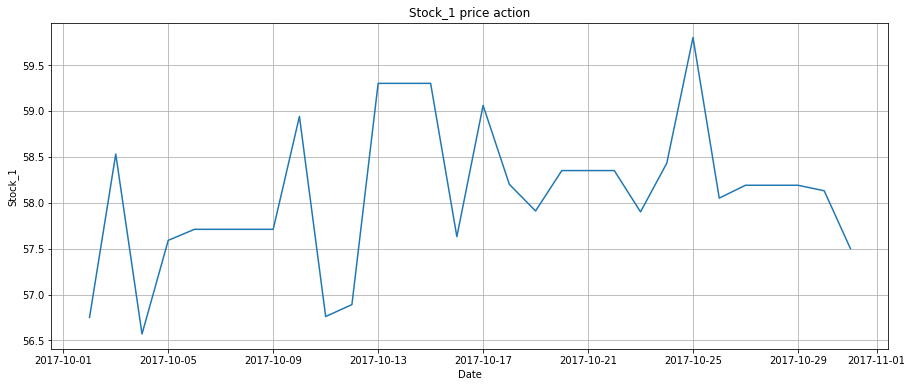

In [69]:
stock_Graph = df2_d['Stock_1']

plt.figure(figsize=(15,6))
plt.grid()
plt.plot(stock_Graph)
plt.xlabel('Date')
plt.ylabel('Stock_1')
plt.title('Stock_1 price action')

Text(0.5, 1.0, 'Stock_2 price action')

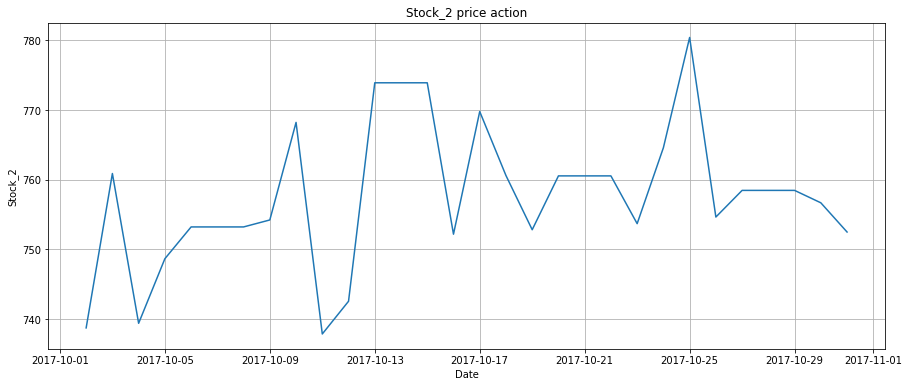

In [70]:
stock_Graph = df2_d['Stock_2']

plt.figure(figsize=(15,6))
plt.grid()
plt.plot(stock_Graph)
plt.xlabel('Date')
plt.ylabel('Stock_2')
plt.title('Stock_2 price action')

Text(0.5, 1.0, 'Stock_3 price action')

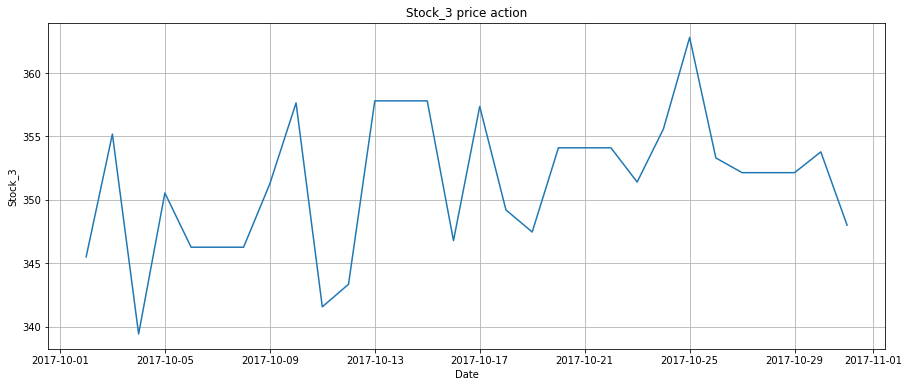

In [71]:
stock_Graph = df2_d['Stock_3']

plt.figure(figsize=(15,6))
plt.grid()
plt.plot(stock_Graph)
plt.xlabel('Date')
plt.ylabel('Stock_3')
plt.title('Stock_3 price action')

Text(0.5, 1.0, 'Stock_4 price action')

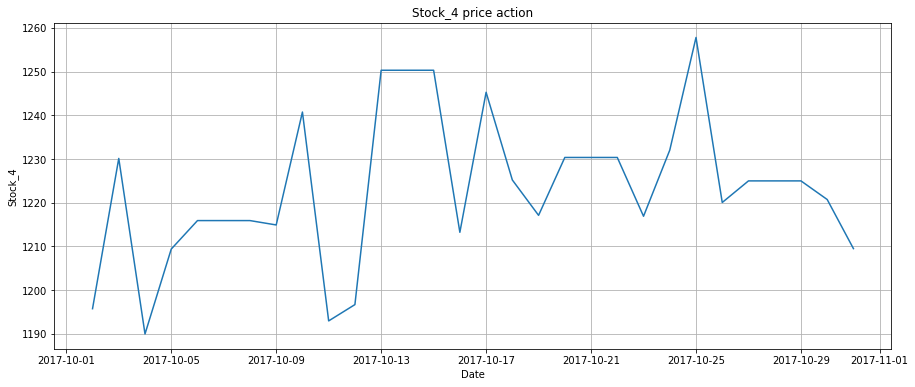

In [72]:
stock_Graph = df2_d['Stock_4']

plt.figure(figsize=(15,6))
plt.grid()
plt.plot(stock_Graph)
plt.xlabel('Date')
plt.ylabel('Stock_4')
plt.title('Stock_4 price action')

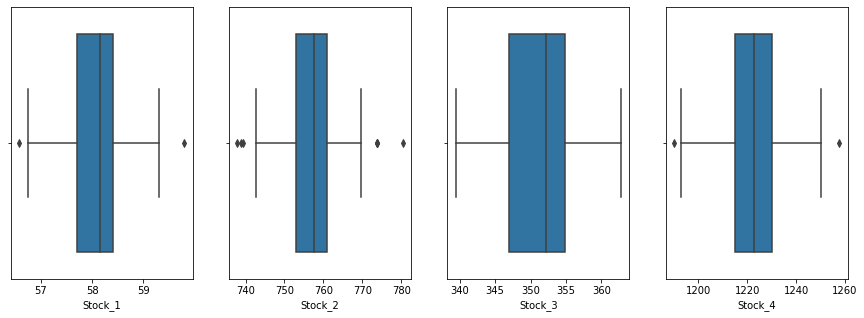

In [73]:
#BOXPLOTS

fig, axs = plt.subplots(1,4, figsize = (15,5))

sns.boxplot(df2_d['Stock_1'], ax = axs[0])
sns.boxplot(df2_d['Stock_2'], ax = axs[1])
sns.boxplot(df2_d['Stock_3'], ax = axs[2])
sns.boxplot(df2_d['Stock_4'], ax = axs[3])

plt.tight_layout
plt.show()

# Model building and Interpretation.

# TRAIN SET

In [74]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

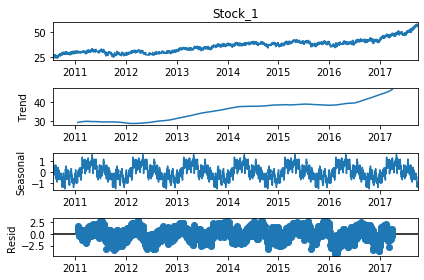

In [75]:
decomposition_1a = seasonal_decompose(df1_d['Stock_1'],model='additive', period=365)
decomposition_1a.plot();

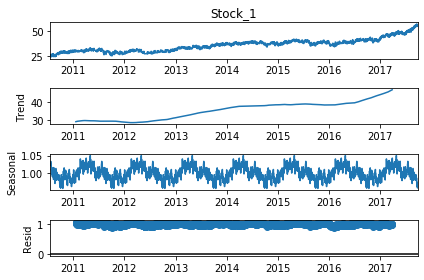

In [76]:
decomposition_1m = seasonal_decompose(df1_d['Stock_1'],model='multiplicative', period=365)
decomposition_1m.plot();

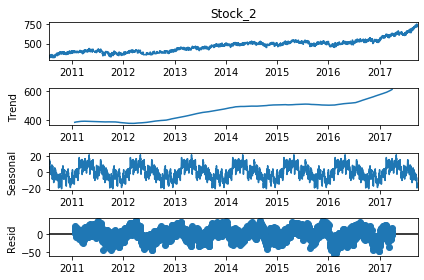

In [77]:
decomposition_2a = seasonal_decompose(df1_d['Stock_2'],model='additive', period=365)
decomposition_2a.plot();

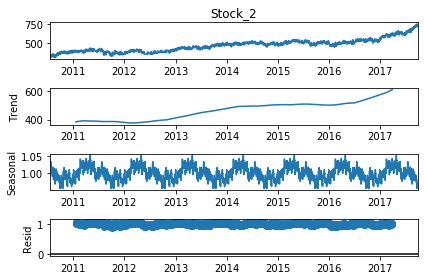

In [78]:
decomposition_2m = seasonal_decompose(df1_d['Stock_2'],model='multiplicative', period=365)
decomposition_2m.plot();

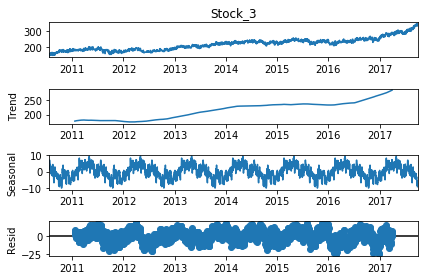

In [79]:
decomposition_3a = seasonal_decompose(df1_d['Stock_3'],model='additive', period=365)
decomposition_3a.plot();

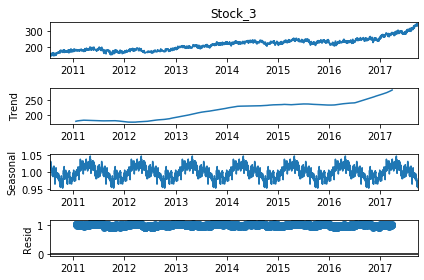

In [80]:
decomposition_3m = seasonal_decompose(df1_d['Stock_3'],model='multiplicative', period=365)
decomposition_3m.plot();

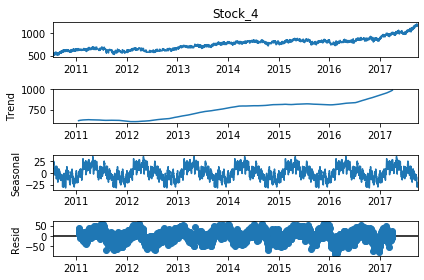

In [81]:
decomposition_4a = seasonal_decompose(df1_d['Stock_4'],model='additive', period=365)
decomposition_4a.plot();

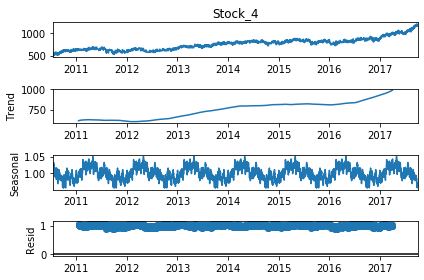

In [82]:
decomposition_4m = seasonal_decompose(df1_d['Stock_4'],model='multiplicative', period=365)
decomposition_4m.plot();

# TEST SET

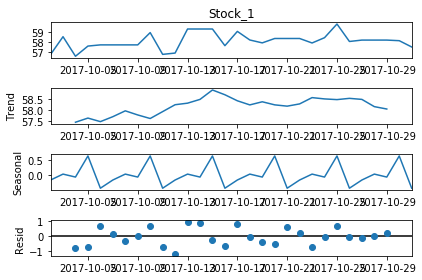

In [83]:
decomposition_1A = seasonal_decompose(df2_d['Stock_1'],model='additive', period=5)
decomposition_1A.plot();

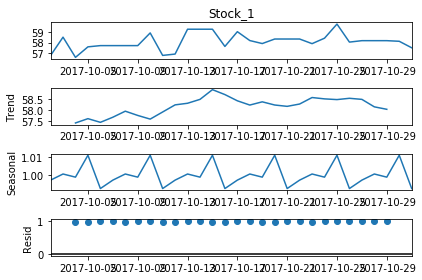

In [84]:
decomposition_1M = seasonal_decompose(df2_d['Stock_1'],model='multiplicative', period=5)
decomposition_1M.plot();

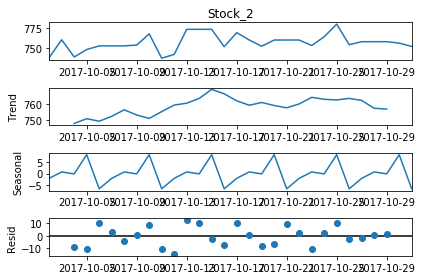

In [85]:
decomposition_2A = seasonal_decompose(df2_d['Stock_2'],model='additive', period=5)
decomposition_2A.plot();

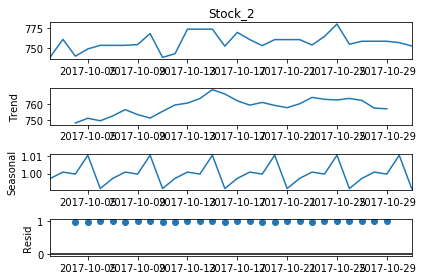

In [86]:
decomposition_2M = seasonal_decompose(df2_d['Stock_2'],model='multiplicative', period=5)
decomposition_2M.plot();

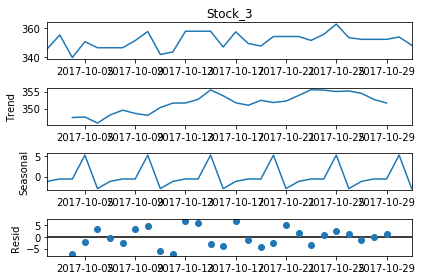

In [87]:
decomposition_3A = seasonal_decompose(df2_d['Stock_3'],model='additive', period=5)
decomposition_3A.plot();

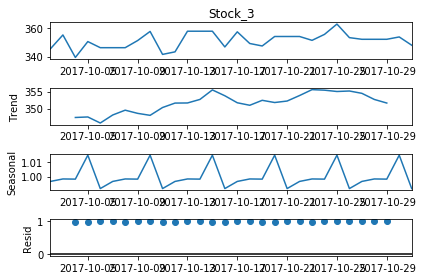

In [88]:
decomposition_3M = seasonal_decompose(df2_d['Stock_3'],model='multiplicative', period=5)
decomposition_3M.plot();

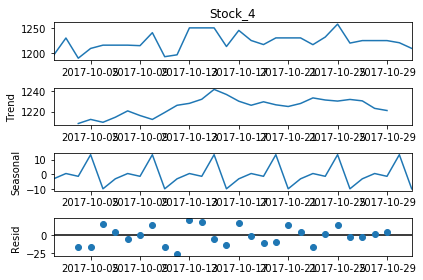

In [89]:
decomposition_4A = seasonal_decompose(df2_d['Stock_4'],model='additive', period=5)
decomposition_4A.plot();

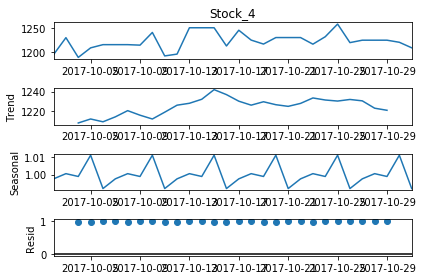

In [90]:
decomposition_4M = seasonal_decompose(df2_d['Stock_4'],model='multiplicative', period=5)
decomposition_4M.plot();

# Check for stationarity of the series at  𝛼  = 0.05 using appropriate statistical tests.

In [91]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    plt.figure(figsize=(8,8))
    orig = plt.plot(timeseries, color='green',label='Original')
    mean = plt.plot(rolmean, color='yellow', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best',labels=['Original','Rolling Mean','Rolling Std'])
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

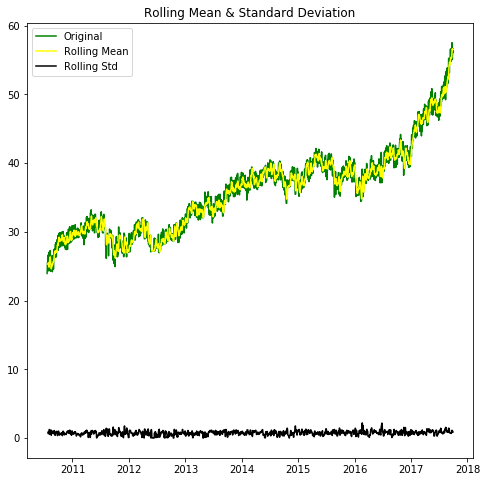

Results of Dickey-Fuller Test:
Test Statistic                    1.129455
p-value                           0.995460
#Lags Used                       27.000000
Number of Observations Used    2600.000000
Critical Value (1%)              -3.432868
Critical Value (5%)              -2.862652
Critical Value (10%)             -2.567362
dtype: float64 



In [92]:
test_stationarity(df1_d['Stock_1'])

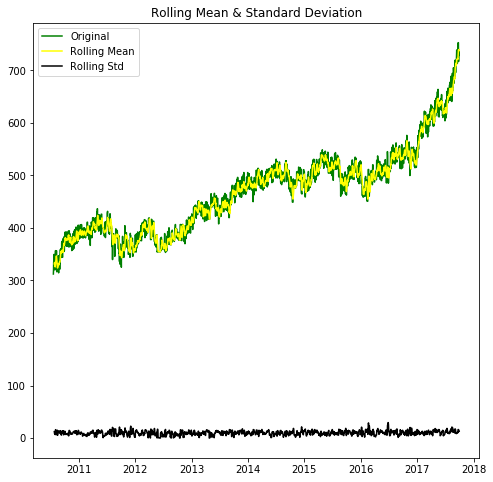

Results of Dickey-Fuller Test:
Test Statistic                    1.144156
p-value                           0.995576
#Lags Used                       27.000000
Number of Observations Used    2600.000000
Critical Value (1%)              -3.432868
Critical Value (5%)              -2.862652
Critical Value (10%)             -2.567362
dtype: float64 



In [93]:
test_stationarity(df1_d['Stock_2'])

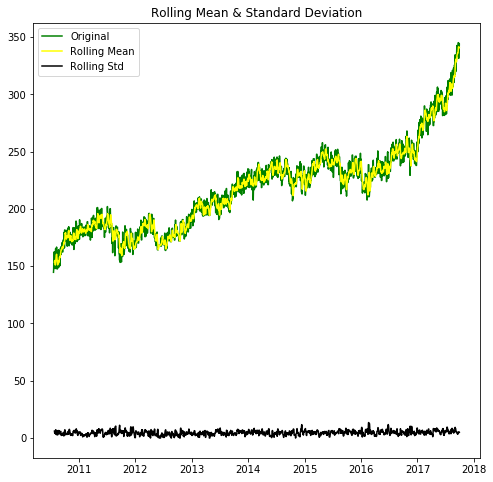

Results of Dickey-Fuller Test:
Test Statistic                    1.138474
p-value                           0.995532
#Lags Used                       27.000000
Number of Observations Used    2600.000000
Critical Value (1%)              -3.432868
Critical Value (5%)              -2.862652
Critical Value (10%)             -2.567362
dtype: float64 



In [94]:
test_stationarity(df1_d['Stock_3'])

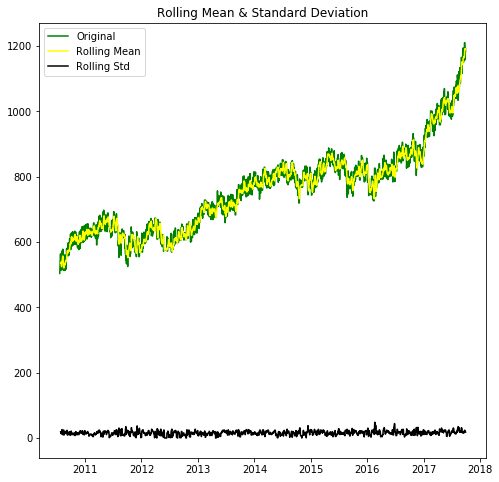

Results of Dickey-Fuller Test:
Test Statistic                    1.131418
p-value                           0.995476
#Lags Used                       27.000000
Number of Observations Used    2600.000000
Critical Value (1%)              -3.432868
Critical Value (5%)              -2.862652
Critical Value (10%)             -2.567362
dtype: float64 



In [95]:
test_stationarity(df1_d['Stock_4'])

**All the time series are not stationary at alpha = 0.05.Therefore, applying difference method.**

# Applying Difference method

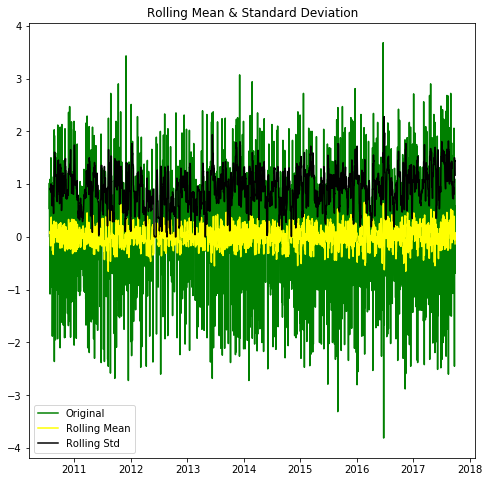

Results of Dickey-Fuller Test:
Test Statistic                -1.263915e+01
p-value                        1.447752e-23
#Lags Used                     2.600000e+01
Number of Observations Used    2.600000e+03
Critical Value (1%)           -3.432868e+00
Critical Value (5%)           -2.862652e+00
Critical Value (10%)          -2.567362e+00
dtype: float64 



In [96]:
test_stationarity(df1_d['Stock_1'].diff().dropna())


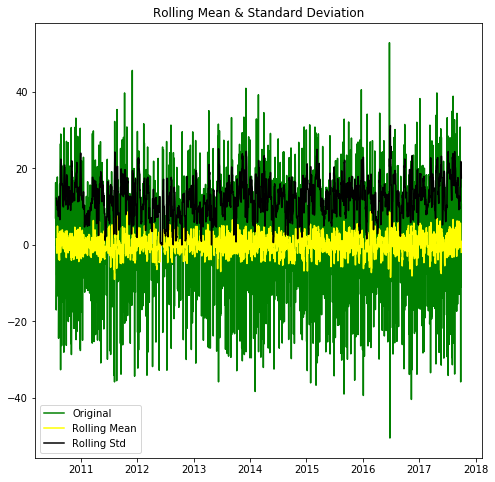

Results of Dickey-Fuller Test:
Test Statistic                -1.372161e+01
p-value                        1.184956e-25
#Lags Used                     2.000000e+01
Number of Observations Used    2.606000e+03
Critical Value (1%)           -3.432862e+00
Critical Value (5%)           -2.862650e+00
Critical Value (10%)          -2.567361e+00
dtype: float64 



In [97]:
test_stationarity(df1_d['Stock_2'].diff().dropna())

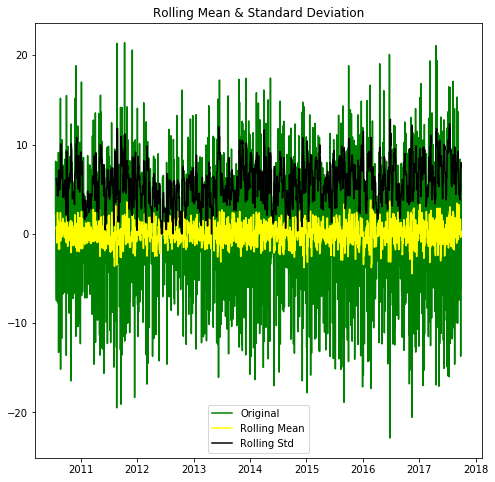

Results of Dickey-Fuller Test:
Test Statistic                -1.287852e+01
p-value                        4.712922e-24
#Lags Used                     2.600000e+01
Number of Observations Used    2.600000e+03
Critical Value (1%)           -3.432868e+00
Critical Value (5%)           -2.862652e+00
Critical Value (10%)          -2.567362e+00
dtype: float64 



In [98]:
test_stationarity(df1_d['Stock_3'].diff().dropna())

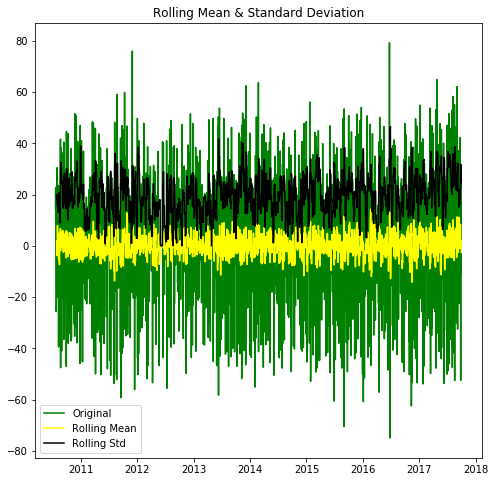

Results of Dickey-Fuller Test:
Test Statistic                -1.261569e+01
p-value                        1.618820e-23
#Lags Used                     2.600000e+01
Number of Observations Used    2.600000e+03
Critical Value (1%)           -3.432868e+00
Critical Value (5%)           -2.862652e+00
Critical Value (10%)          -2.567362e+00
dtype: float64 



In [99]:
test_stationarity(df1_d['Stock_4'].diff().dropna())

**As we can see now the time series are stationary at alpha = 0.05**


# Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [100]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation 

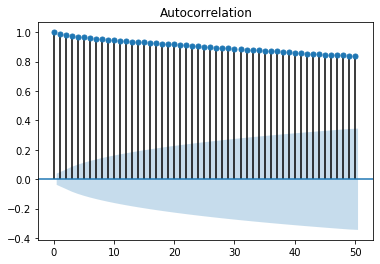

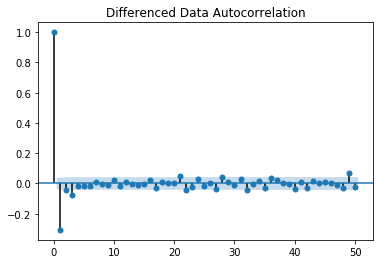

In [101]:
plot_acf(df1_d['Stock_1'],lags=50)
plot_acf(df1_d['Stock_1'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

# Partial Autocorrelation

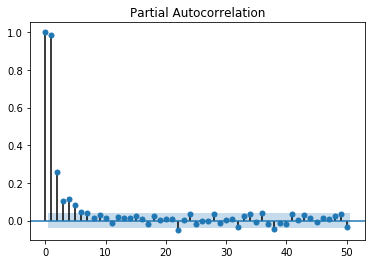

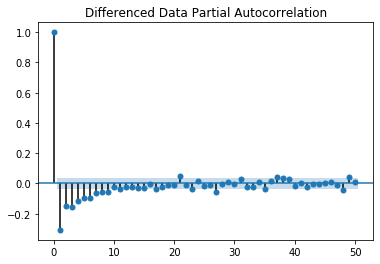

In [102]:
plot_pacf(df1_d['Stock_1'],lags=50)

plot_pacf(df1_d['Stock_1'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')

plt.show()

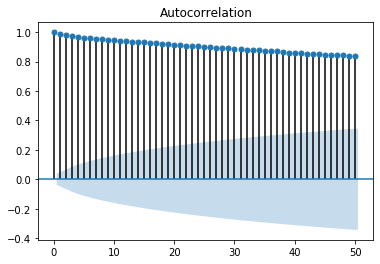

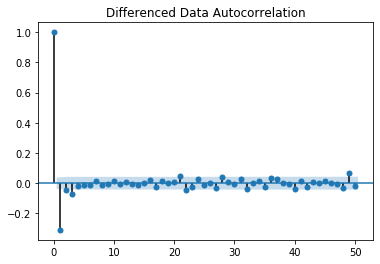

In [103]:
plot_acf(df1_d['Stock_2'],lags=50)
plot_acf(df1_d['Stock_2'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

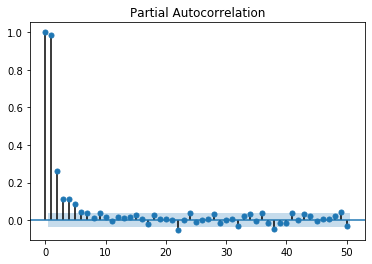

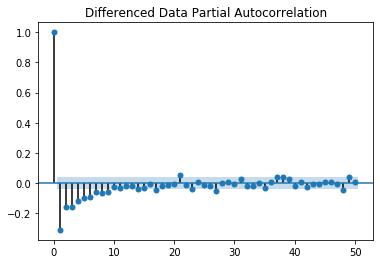

In [104]:
plot_pacf(df1_d['Stock_2'],lags=50)

plot_pacf(df1_d['Stock_2'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')

plt.show()

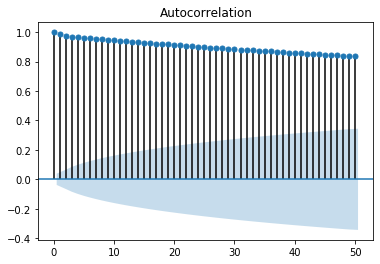

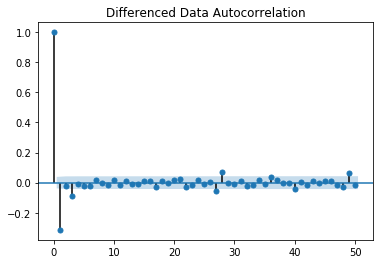

In [105]:
plot_acf(df1_d['Stock_3'],lags=50)
plot_acf(df1_d['Stock_3'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

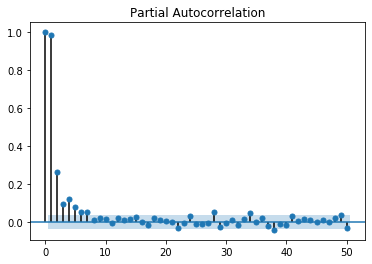

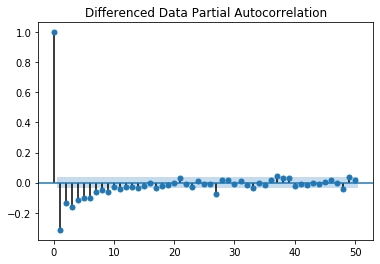

In [106]:
plot_pacf(df1_d['Stock_3'],lags=50)

plot_pacf(df1_d['Stock_3'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')

plt.show()

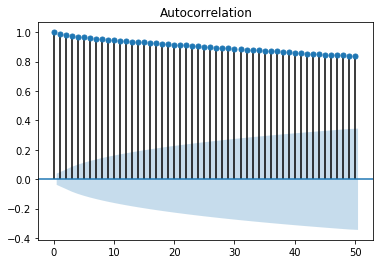

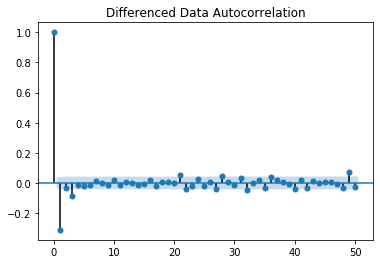

In [107]:
plot_acf(df1_d['Stock_4'],lags=50)
plot_acf(df1_d['Stock_4'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

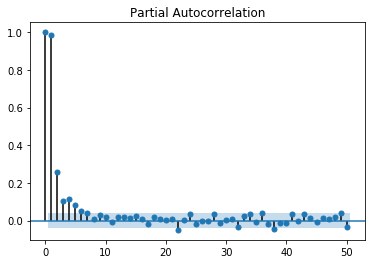

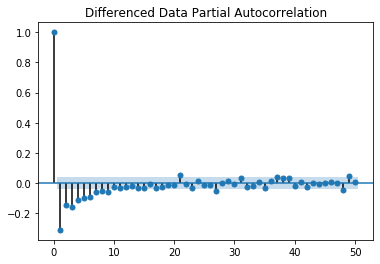

In [108]:
plot_pacf(df1_d['Stock_4'],lags=50)

plot_pacf(df1_d['Stock_4'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')

plt.show()

In [109]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 5)
Model: (0, 0, 1)(0, 0, 2, 5)
Model: (0, 0, 2)(1, 0, 0, 5)
Model: (0, 0, 2)(1, 0, 1, 5)


# Build an ARIMA model.

# For Stock_1

In [110]:
# Creating an empty Dataframe with column names only
dfObj_1 = pd.DataFrame(columns=['param', 'AIC'])
dfObj_1

Empty DataFrame
Columns: [param, AIC]
Index: []

In [111]:
## Let's start by building ARIMA model -- Although the data set has some seasonality and hence ARIMA is 
## not the right option Reason for making the model is to understand how different the model could be if seasonality is not considered

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(df1_d['Stock_1'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj_1 = dfObj_1.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 0, 0) - AIC:17109.732375667118
ARIMA(0, 0, 1) - AIC:14155.329071097265
ARIMA(0, 0, 2) - AIC:12211.630596505473
ARIMA(1, 0, 0) - AIC:7231.603127448263
ARIMA(1, 0, 1) - AIC:6866.807370696835


C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


ARIMA(1, 0, 2) - AIC:6797.753686311647
ARIMA(2, 0, 0) - AIC:6980.561903857051
ARIMA(2, 0, 1) - AIC:6753.107133397301


In [112]:
dfObj_1.sort_values(by=['AIC'])
         

param           AIC
7  (2, 0, 1)   6753.107133
5  (1, 0, 2)   6797.753686
4  (1, 0, 1)   6866.807371
6  (2, 0, 0)   6980.561904
3  (1, 0, 0)   7231.603127
2  (0, 0, 2)  12211.630597
1  (0, 0, 1)  14155.329071
0  (0, 0, 0)  17109.732376

In [113]:
## ARIMA(2,0,1) has the lowest AIC
mod = ARIMA(df1_d['Stock_1'], order=(2,0,1))

results_Arima = mod.fit()

print(results_Arima.summary())

                              ARMA Model Results                              
Dep. Variable:                Stock_1   No. Observations:                 2628
Model:                     ARMA(2, 1)   Log Likelihood               -3371.554
Method:                       css-mle   S.D. of innovations              0.872
Date:                Fri, 02 Jul 2021   AIC                           6753.107
Time:                        16:08:09   BIC                           6782.477
Sample:                    07-21-2010   HQIC                          6763.743
                         - 09-29-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            39.7183     12.314      3.225      0.001      15.582      63.854
ar.L1.Stock_1     1.4131      0.001   1064.115      0.000       1.410       1.416
ar.L2.Stock_1    -0.4132      0.001   -3

In [114]:
final_hat_avg =df2_d.copy()
pred_ARIMA = results_Arima.forecast(steps=len(df2_d))
pred_ARIMA[0]

array([56.41746682, 56.34031403, 56.30670921, 56.29110057, 56.28292903,
       56.27783112, 56.27400366, 56.27070152, 56.26761677, 56.26462215,
       56.26166509, 56.25872385, 56.25578946, 56.25285819, 56.24992853,
       56.24699983, 56.24407184, 56.24114443, 56.23821758, 56.23529126,
       56.23236547, 56.22944019, 56.22651544, 56.2235912 , 56.22066748,
       56.21774428, 56.21482159, 56.21189943, 56.20897778, 56.20605665])

In [115]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(df2_d.Stock_1,pred_ARIMA[0]))
print(rmse)

2.0096661755559584


In [116]:
resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(2, 0, 1)'])

resultsDf

Test RMSE
ARIMA(2, 0, 1)   2.009666

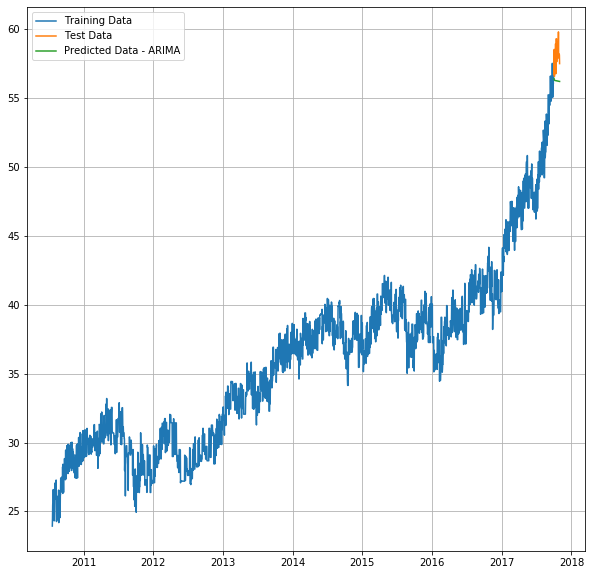

In [117]:
plt.figure(figsize=(10,10))
plt.plot(df1_d['Stock_1'],label='Training Data')
plt.plot(df2_d['Stock_1'],label='Test Data')
plt.plot(df2_d['Stock_1'].index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# For Stock_2

In [118]:
# Creating an empty Dataframe with column names only
dfObj_2 = pd.DataFrame(columns=['param', 'AIC'])
dfObj_2

Empty DataFrame
Columns: [param, AIC]
Index: []

In [119]:

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(df1_d['Stock_2'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj_2 = dfObj_2.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 0, 0) - AIC:30592.125821385485
ARIMA(0, 0, 1) - AIC:27641.231452592965
ARIMA(0, 0, 2) - AIC:25717.908493327388
ARIMA(1, 0, 0) - AIC:20800.204927298644
ARIMA(1, 0, 1) - AIC:20420.720074203742
ARIMA(1, 0, 2) - AIC:20348.435551411905
ARIMA(2, 0, 0) - AIC:20544.80489952626
ARIMA(2, 0, 1) - AIC:20314.597934560665


In [120]:
dfObj_2.sort_values(by=['AIC'])
         

param           AIC
7  (2, 0, 1)  20314.597935
5  (1, 0, 2)  20348.435551
4  (1, 0, 1)  20420.720074
6  (2, 0, 0)  20544.804900
3  (1, 0, 0)  20800.204927
2  (0, 0, 2)  25717.908493
1  (0, 0, 1)  27641.231453
0  (0, 0, 0)  30592.125821

In [121]:
## ARIMA(2,0,1) has the lowest AIC
mod = ARIMA(df1_d['Stock_2'], order=(2,0,1))

results_Arima = mod.fit()

print(results_Arima.summary())

                              ARMA Model Results                              
Dep. Variable:                Stock_2   No. Observations:                 2628
Model:                     ARMA(2, 1)   Log Likelihood              -10152.299
Method:                       css-mle   S.D. of innovations             11.490
Date:                Fri, 02 Jul 2021   AIC                          20314.598
Time:                        16:08:19   BIC                          20343.968
Sample:                    07-21-2010   HQIC                         20325.234
                         - 09-29-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           469.2269        nan        nan        nan         nan         nan
ar.L1.Stock_2     1.4051    1.2e-05   1.17e+05      0.000       1.405       1.405
ar.L2.Stock_2    -0.4051   3.45e-06  -1.

C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\Saurabh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Saurabh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Saurabh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [122]:
final_hat_avg =df2_d.copy()
pred_ARIMA = results_Arima.forecast(steps=len(df2_d))
pred_ARIMA[0]

array([736.28203153, 735.26199686, 734.84877462, 734.68137188,
       734.61355052, 734.58606954, 734.57493044, 734.57041143,
       734.56857421, 734.56782339, 734.56751266, 734.56738022,
       734.56732   , 734.56728903, 734.56726992, 734.56725561,
       734.56724325, 734.56723167, 734.56722041, 734.56720929,
       734.56719821, 734.56718716, 734.56717611, 734.56716507,
       734.56715403, 734.56714299, 734.56713195, 734.56712091,
       734.56710987, 734.56709883])

In [123]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(df2_d.Stock_2,pred_ARIMA[0]))
print(rmse)

25.192697827779106


In [124]:
resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(2, 0, 1)'])

resultsDf

Test RMSE
ARIMA(2, 0, 1)  25.192698

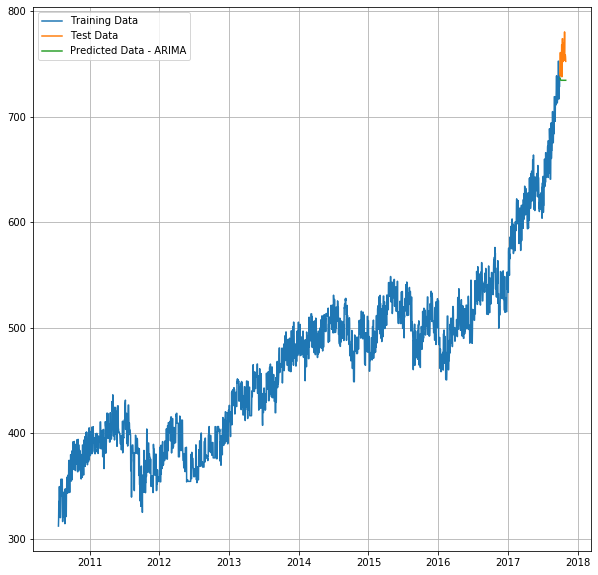

In [125]:
plt.figure(figsize=(10,10))
plt.plot(df1_d['Stock_2'],label='Training Data')
plt.plot(df2_d['Stock_2'],label='Test Data')
plt.plot(df2_d['Stock_2'].index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# Stock_3

In [126]:
# Creating an empty Dataframe with column names only
dfObj_3 = pd.DataFrame(columns=['param', 'AIC'])
dfObj_3

Empty DataFrame
Columns: [param, AIC]
Index: []

In [127]:

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(df1_d['Stock_3'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj_3 = dfObj_3.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 0, 0) - AIC:26533.737093856544
ARIMA(0, 0, 1) - AIC:23611.560248656457
ARIMA(0, 0, 2) - AIC:21669.66632751455
ARIMA(1, 0, 0) - AIC:16826.227752771538
ARIMA(1, 0, 1) - AIC:16454.995122245233
ARIMA(1, 0, 2) - AIC:16392.952770957818
ARIMA(2, 0, 0) - AIC:16562.5142231618


C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1) - AIC:16352.560132985418
ARIMA(2, 0, 2) - AIC:16343.143355536842


C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [128]:
dfObj_3.sort_values(by=['AIC'])

param           AIC
8  (2, 0, 2)  16343.143356
7  (2, 0, 1)  16352.560133
5  (1, 0, 2)  16392.952771
4  (1, 0, 1)  16454.995122
6  (2, 0, 0)  16562.514223
3  (1, 0, 0)  16826.227753
2  (0, 0, 2)  21669.666328
1  (0, 0, 1)  23611.560249
0  (0, 0, 0)  26533.737094

In [129]:
## ARIMA(2,0,2) has the lowest AIC
mod = ARIMA(df1_d['Stock_3'], order=(2,0,2))

results_Arima = mod.fit()

print(results_Arima.summary())

C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                              ARMA Model Results                              
Dep. Variable:                Stock_3   No. Observations:                 2628
Model:                     ARMA(2, 2)   Log Likelihood               -8165.572
Method:                       css-mle   S.D. of innovations              5.395
Date:                Fri, 02 Jul 2021   AIC                          16343.143
Time:                        16:08:28   BIC                          16378.387
Sample:                    07-21-2010   HQIC                         16355.906
                         - 09-29-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           218.2243        nan        nan        nan         nan         nan
ar.L1.Stock_3     1.5924   1.47e-05   1.08e+05      0.000       1.592       1.592
ar.L2.Stock_3    -0.5924   5.47e-06  -1.

C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\Saurabh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Saurabh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Saurabh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [130]:
final_hat_avg =df2_d.copy()
pred_ARIMA3 = results_Arima.forecast(steps=len(df2_d))
pred_ARIMA3[0]

array([341.37549523, 340.72977707, 340.34726268, 340.12066602,
       339.98643253, 339.90691351, 339.85980648, 339.83189978,
       339.81536706, 339.80557211, 339.7997685 , 339.79632929,
       339.79429073, 339.79308188, 339.79236454, 339.79193836,
       339.79168466, 339.79153314, 339.79144214, 339.791387  ,
       339.7913531 , 339.79133178, 339.79131791, 339.79130846,
       339.79130163, 339.79129634, 339.79129197, 339.79128815,
       339.79128465, 339.79128134])

In [131]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(df2_d.Stock_3,pred_ARIMA3[0]))
print(rmse)

12.685823364608634


In [132]:
resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(2, 0, 2)'])

resultsDf

Test RMSE
ARIMA(2, 0, 2)  12.685823

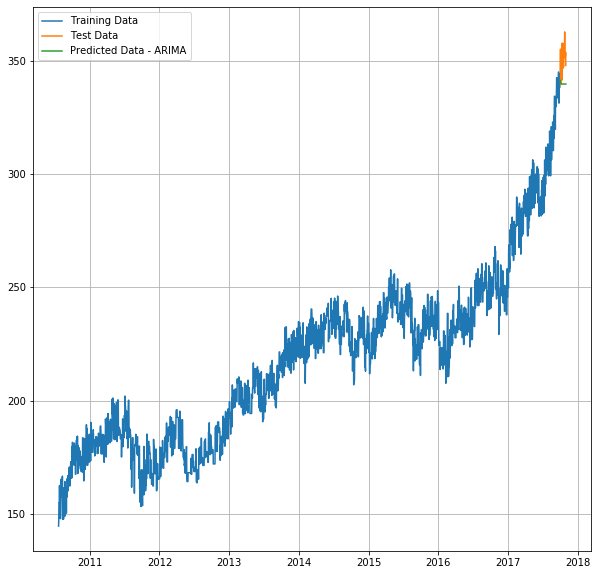

In [133]:
plt.figure(figsize=(10,10))
plt.plot(df1_d['Stock_3'],label='Training Data')
plt.plot(df2_d['Stock_3'],label='Test Data')
plt.plot(df2_d['Stock_3'].index,pred_ARIMA3[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# Stock_4

In [134]:
# Creating an empty Dataframe with column names only
dfObj_4 = pd.DataFrame(columns=['param', 'AIC'])
dfObj_4

Empty DataFrame
Columns: [param, AIC]
Index: []

In [135]:

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(df1_d['Stock_4'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj_4 = dfObj_4.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 0, 0) - AIC:33108.53235101426
ARIMA(0, 0, 1) - AIC:30162.90039812239
ARIMA(0, 0, 2) - AIC:28217.54379661791
ARIMA(1, 0, 0) - AIC:23263.19904771908
ARIMA(1, 0, 1) - AIC:22888.41266411656
ARIMA(1, 0, 2) - AIC:22821.69031012496
ARIMA(2, 0, 0) - AIC:23004.01664322961
ARIMA(2, 0, 1) - AIC:22777.627529304453
ARIMA(2, 0, 2) - AIC:22777.760517737046


In [136]:
dfObj_4.sort_values(by=['AIC'])

param           AIC
7  (2, 0, 1)  22777.627529
8  (2, 0, 2)  22777.760518
5  (1, 0, 2)  22821.690310
4  (1, 0, 1)  22888.412664
6  (2, 0, 0)  23004.016643
3  (1, 0, 0)  23263.199048
2  (0, 0, 2)  28217.543797
1  (0, 0, 1)  30162.900398
0  (0, 0, 0)  33108.532351

In [137]:
## ARIMA(2,0,1) has the lowest AIC
mod = ARIMA(df1_d['Stock_4'], order=(2,0,1))

results_Arima = mod.fit()

print(results_Arima.summary())

                              ARMA Model Results                              
Dep. Variable:                Stock_4   No. Observations:                 2628
Model:                     ARMA(2, 1)   Log Likelihood              -11383.814
Method:                       css-mle   S.D. of innovations             18.387
Date:                Fri, 02 Jul 2021   AIC                          22777.628
Time:                        16:08:40   BIC                          22806.997
Sample:                    07-21-2010   HQIC                         22788.263
                         - 09-29-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           838.6273    258.432      3.245      0.001     332.109    1345.146
ar.L1.Stock_4     1.4072      0.001   1023.266      0.000       1.404       1.410
ar.L2.Stock_4    -0.4073      0.001   -2

In [138]:
final_hat_avg =df2_d.copy()
pred_ARIMA = results_Arima.forecast(steps=len(df2_d))
pred_ARIMA[0]

array([1187.48882003, 1185.77756124, 1185.04393024, 1184.70854787,
       1184.53540082, 1184.42834774, 1184.34822491, 1184.27907877,
       1184.21441056, 1184.15157297, 1184.08948758, 1184.02771512,
       1183.96607663, 1183.90449922, 1183.84295318, 1183.78142642,
       1183.71991401, 1183.65841395, 1183.5969254 , 1183.53544805,
       1183.47398174, 1183.41252642, 1183.35108207, 1183.28964868,
       1183.22822624, 1183.16681475, 1183.1054142 , 1183.04402459,
       1182.98264592, 1182.92127819])

In [139]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(df2_d.Stock_4,pred_ARIMA[0]))
print(rmse)

42.841306428674734


In [140]:
resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(2, 0, 1)'])

resultsDf

Test RMSE
ARIMA(2, 0, 1)  42.841306

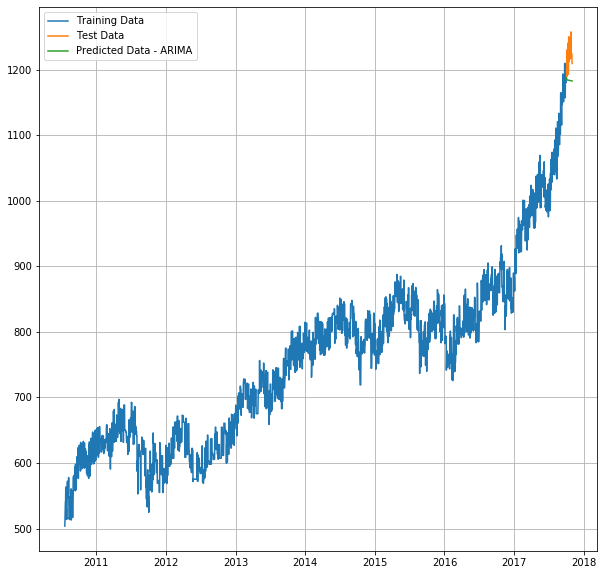

In [141]:
plt.figure(figsize=(10,10))
plt.plot(df1_d['Stock_4'],label='Training Data')
plt.plot(df2_d['Stock_4'],label='Test Data')
plt.plot(df2_d['Stock_4'].index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# Improvised Model

**As we can see in the above graphs that the result or prediction is not clearly visible to do that improvement is done by only considering last 1 year data which is sufficient for predicting the future values.**

In [142]:
imp_Trainmodel = df1_d['29-09-2016':'29-09-2017']

In [143]:
imp_Trainmodel.head()

Stock_1  Stock_2  Stock_3  Stock_4
Date                                          
2016-09-29    42.10   547.30   256.60   885.10
2016-09-30    41.28   538.64   248.68   866.88
2016-10-01    41.28   538.64   248.68   866.88
2016-10-02    41.28   538.64   248.68   866.88
2016-10-03    41.28   538.64   248.68   866.88

In [144]:
imp_Trainmodel.tail()

Stock_1  Stock_2  Stock_3  Stock_4
Date                                          
2017-09-25    55.06   716.78   331.36  1157.26
2017-09-26    56.16   735.08   338.96  1183.36
2017-09-27    56.71   739.23   344.26  1190.91
2017-09-28    56.02   728.26   338.12  1180.42
2017-09-29    56.60   738.80   343.60  1191.60

# Stock_1

In [145]:
# Creating an empty Dataframe with column names only
dfObj_imp1 = pd.DataFrame(columns=['param', 'AIC'])
dfObj_imp1

Empty DataFrame
Columns: [param, AIC]
Index: []

In [146]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(imp_Trainmodel['Stock_1'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj_imp1 = dfObj_imp1.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 0, 0) - AIC:2119.5169344425217
ARIMA(0, 0, 1) - AIC:1787.8184911016901
ARIMA(0, 0, 2) - AIC:1564.4360705553252
ARIMA(1, 0, 0) - AIC:1126.8708257487222


C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


ARIMA(1, 0, 1) - AIC:1044.1222005705522
ARIMA(1, 0, 2) - AIC:1044.9357985868382
ARIMA(2, 0, 0) - AIC:1066.3493277357438
ARIMA(2, 0, 1) - AIC:1044.5560443758975
ARIMA(2, 0, 2) - AIC:1044.135752485077


In [147]:
dfObj_imp1.sort_values(by=['AIC'])

param          AIC
4  (1, 0, 1)  1044.122201
8  (2, 0, 2)  1044.135752
7  (2, 0, 1)  1044.556044
5  (1, 0, 2)  1044.935799
6  (2, 0, 0)  1066.349328
3  (1, 0, 0)  1126.870826
2  (0, 0, 2)  1564.436071
1  (0, 0, 1)  1787.818491
0  (0, 0, 0)  2119.516934

In [148]:
## ARIMA(1,0,1) has the lowest AIC
mod = ARIMA(imp_Trainmodel['Stock_1'], order=(1,0,1))

results_Arima = mod.fit()

print(results_Arima.summary())

C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


                              ARMA Model Results                              
Dep. Variable:                Stock_1   No. Observations:                  366
Model:                     ARMA(1, 1)   Log Likelihood                -518.061
Method:                       css-mle   S.D. of innovations              0.991
Date:                Fri, 02 Jul 2021   AIC                           1044.122
Time:                        16:08:45   BIC                           1059.733
Sample:                    09-29-2016   HQIC                          1050.325
                         - 09-29-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            48.2716      5.240      9.211      0.000      38.000      58.543
ar.L1.Stock_1     0.9976      0.003    337.596      0.000       0.992       1.003
ma.L1.Stock_1    -0.5600      0.049    -

In [149]:
final_hat_avg =df2_d.copy()
pred_ARIMA1 = results_Arima.forecast(steps=len(df2_d))
pred_ARIMA1[0]

array([56.35962132, 56.33991068, 56.32024808, 56.3006334 , 56.28106652,
       56.26154733, 56.2420757 , 56.22265152, 56.20327469, 56.18394507,
       56.16466256, 56.14542704, 56.1262384 , 56.10709653, 56.0880013 ,
       56.06895261, 56.04995034, 56.03099437, 56.01208461, 55.99322093,
       55.97440321, 55.95563136, 55.93690526, 55.91822479, 55.89958985,
       55.88100032, 55.86245609, 55.84395705, 55.8255031 , 55.80709412])

In [150]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(df2_d.Stock_1,pred_ARIMA1[0]))
print(rmse)

2.190937325062591


In [151]:
resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(1, 0, 1)'])

resultsDf

Test RMSE
ARIMA(1, 0, 1)   2.190937

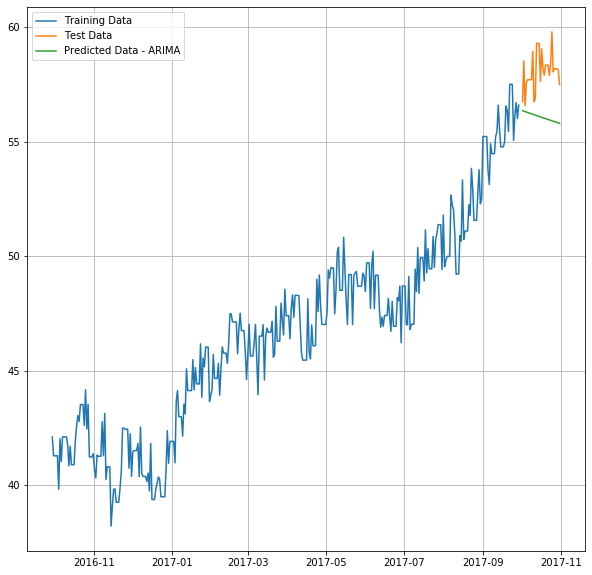

In [152]:
plt.figure(figsize=(10,10))
plt.plot(imp_Trainmodel['Stock_1'],label='Training Data')
plt.plot(df2_d['Stock_1'],label='Test Data')
plt.plot(df2_d['Stock_1'].index,pred_ARIMA1[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# Stock_2

In [153]:
# Creating an empty Dataframe with column names only
dfObj_imp2 = pd.DataFrame(columns=['param', 'AIC'])
dfObj_imp2

Empty DataFrame
Columns: [param, AIC]
Index: []

In [154]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(imp_Trainmodel['Stock_2'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj_imp2 = dfObj_imp2.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 0, 0) - AIC:3998.155448112302
ARIMA(0, 0, 1) - AIC:3665.5635071725746
ARIMA(0, 0, 2) - AIC:3442.597892663459
ARIMA(1, 0, 0) - AIC:3005.560930600582


C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


ARIMA(1, 0, 1) - AIC:2921.9174224696526
ARIMA(1, 0, 2) - AIC:2922.7885188659097
ARIMA(2, 0, 0) - AIC:2944.486325211654
ARIMA(2, 0, 1) - AIC:2922.435072279831
ARIMA(2, 0, 2) - AIC:2922.7467257867756


In [155]:
dfObj_imp2.sort_values(by=['AIC'])

param          AIC
4  (1, 0, 1)  2921.917422
7  (2, 0, 1)  2922.435072
8  (2, 0, 2)  2922.746726
5  (1, 0, 2)  2922.788519
6  (2, 0, 0)  2944.486325
3  (1, 0, 0)  3005.560931
2  (0, 0, 2)  3442.597893
1  (0, 0, 1)  3665.563507
0  (0, 0, 0)  3998.155448

In [156]:
## ARIMA(1,0,1) has the lowest AIC
mod = ARIMA(imp_Trainmodel['Stock_2'], order=(1,0,1))

results_Arima = mod.fit()

print(results_Arima.summary())

C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


                              ARMA Model Results                              
Dep. Variable:                Stock_2   No. Observations:                  366
Model:                     ARMA(1, 1)   Log Likelihood               -1456.959
Method:                       css-mle   S.D. of innovations             12.887
Date:                Fri, 02 Jul 2021   AIC                           2921.917
Time:                        16:08:49   BIC                           2937.528
Sample:                    09-29-2016   HQIC                          2928.121
                         - 09-29-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           629.6049     68.679      9.167      0.000     494.997     764.213
ar.L1.Stock_2     0.9976      0.003    342.510      0.000       0.992       1.003
ma.L1.Stock_2    -0.5618      0.049    -

In [157]:
final_hat_avg =df2_d.copy()
pred_ARIMA2 = results_Arima.forecast(steps=len(df2_d))
pred_ARIMA2[0]

array([734.94718642, 734.69524519, 734.44390651, 734.19316894,
       733.94303105, 733.6934914 , 733.44454856, 733.1962011 ,
       732.94844761, 732.70128665, 732.45471681, 732.20873667,
       731.96334484, 731.71853989, 731.47432043, 731.23068506,
       730.98763238, 730.74516099, 730.5032695 , 730.26195654,
       730.02122071, 729.78106063, 729.54147494, 729.30246224,
       729.06402118, 728.82615039, 728.58884849, 728.35211414,
       728.11594598, 727.88034264])

In [158]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(df2_d.Stock_2,pred_ARIMA2[0]))
print(rmse)

28.50216481954326


In [159]:
resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(1, 0, 1)'])

resultsDf

Test RMSE
ARIMA(1, 0, 1)  28.502165

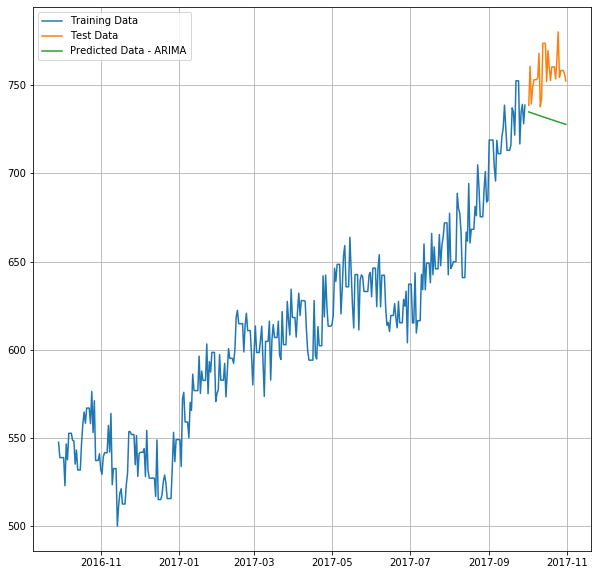

In [160]:
plt.figure(figsize=(10,10))
plt.plot(imp_Trainmodel['Stock_2'],label='Training Data')
plt.plot(df2_d['Stock_2'],label='Test Data')
plt.plot(df2_d['Stock_2'].index,pred_ARIMA2[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# Stock_3

In [161]:
# Creating an empty Dataframe with column names only
dfObj_imp3 = pd.DataFrame(columns=['param', 'AIC'])
dfObj_imp3

Empty DataFrame
Columns: [param, AIC]
Index: []

In [162]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(imp_Trainmodel['Stock_3'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj_imp3 = dfObj_imp3.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 0, 0) - AIC:3434.1197697025473
ARIMA(0, 0, 1) - AIC:3110.061749996831
ARIMA(0, 0, 2) - AIC:2895.749230624928
ARIMA(1, 0, 0) - AIC:2481.4640819268125
ARIMA(1, 0, 1) - AIC:2401.1468503690185
ARIMA(1, 0, 2) - AIC:2402.2267365715306
ARIMA(2, 0, 0) - AIC:2420.21920517503
ARIMA(2, 0, 1) - AIC:2401.8021178853023
ARIMA(2, 0, 2) - AIC:2400.4781304686685


In [163]:
dfObj_imp3.sort_values(by=['AIC'])

param          AIC
8  (2, 0, 2)  2400.478130
4  (1, 0, 1)  2401.146850
7  (2, 0, 1)  2401.802118
5  (1, 0, 2)  2402.226737
6  (2, 0, 0)  2420.219205
3  (1, 0, 0)  2481.464082
2  (0, 0, 2)  2895.749231
1  (0, 0, 1)  3110.061750
0  (0, 0, 0)  3434.119770

In [164]:
## ARIMA(2,0,2) has the lowest AIC
mod = ARIMA(imp_Trainmodel['Stock_3'], order=(2,0,2))

results_Arima = mod.fit()

print(results_Arima.summary())

                              ARMA Model Results                              
Dep. Variable:                Stock_3   No. Observations:                  366
Model:                     ARMA(2, 2)   Log Likelihood               -1194.239
Method:                       css-mle   S.D. of innovations              6.288
Date:                Fri, 02 Jul 2021   AIC                           2400.478
Time:                        16:08:54   BIC                           2423.894
Sample:                    09-29-2016   HQIC                          2409.783
                         - 09-29-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           291.3616     28.905     10.080      0.000     234.709     348.014
ar.L1.Stock_3     0.0377      0.034      1.099      0.272      -0.030       0.105
ar.L2.Stock_3     0.9557      0.034     

In [165]:
final_hat_avg =df2_d.copy()
pred_ARIMA3 = results_Arima.forecast(steps=len(df2_d))
pred_ARIMA3[0]

array([341.2053698 , 341.09880485, 340.87429845, 340.76398466,
       340.54525805, 340.43157939, 340.21824977, 340.10155875,
       339.89327355, 339.77389381, 339.57032828, 339.44855685,
       339.24941183, 339.12552133, 338.93052117, 338.80476174,
       338.61365244, 338.48625357, 338.29880103, 338.16997321,
       337.98596164, 337.85589792, 337.67512835, 337.54400572,
       337.36629468, 337.23427536, 337.05945361, 336.92668629,
       336.75459768, 336.62121855])

In [166]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(df2_d.Stock_3,pred_ARIMA3[0]))
print(rmse)

13.858589656423998


In [167]:
resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(2, 0, 2)'])

resultsDf

Test RMSE
ARIMA(2, 0, 2)   13.85859

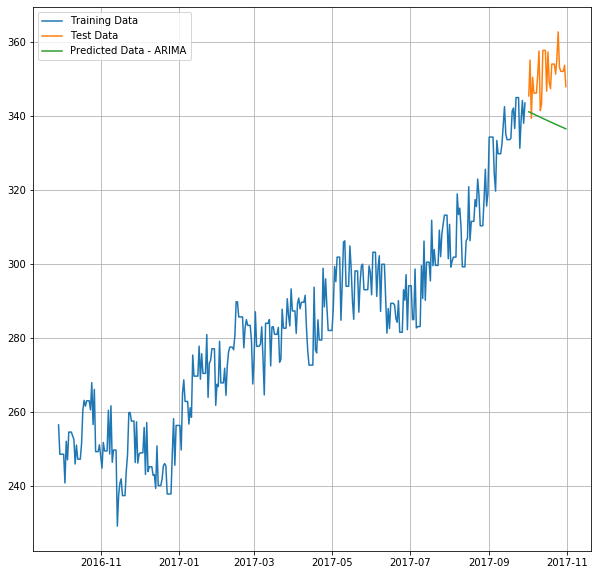

In [168]:
plt.figure(figsize=(10,10))
plt.plot(imp_Trainmodel['Stock_3'],label='Training Data')
plt.plot(df2_d['Stock_3'],label='Test Data')
plt.plot(df2_d['Stock_3'].index,pred_ARIMA3[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# Stock_4

In [169]:
# Creating an empty Dataframe with column names only
dfObj_imp4 = pd.DataFrame(columns=['param', 'AIC'])
dfObj_imp4

Empty DataFrame
Columns: [param, AIC]
Index: []

In [170]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(imp_Trainmodel['Stock_4'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj_imp4 = dfObj_imp4.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 0, 0) - AIC:4349.72644045161
ARIMA(0, 0, 1) - AIC:4019.8465710693417
ARIMA(0, 0, 2) - AIC:3797.5870777509062
ARIMA(1, 0, 0) - AIC:3364.6292182706375
ARIMA(1, 0, 1) - AIC:3282.03431798002
ARIMA(1, 0, 2) - AIC:3282.814287587561
ARIMA(2, 0, 0) - AIC:3303.28058880529
ARIMA(2, 0, 1) - AIC:3282.358416824736
ARIMA(2, 0, 2) - AIC:3282.1973982193713


In [171]:
dfObj_imp4.sort_values(by=['AIC'])

param          AIC
4  (1, 0, 1)  3282.034318
8  (2, 0, 2)  3282.197398
7  (2, 0, 1)  3282.358417
5  (1, 0, 2)  3282.814288
6  (2, 0, 0)  3303.280589
3  (1, 0, 0)  3364.629218
2  (0, 0, 2)  3797.587078
1  (0, 0, 1)  4019.846571
0  (0, 0, 0)  4349.726440

In [172]:
## ARIMA(1,0,1) has the lowest AIC
mod = ARIMA(imp_Trainmodel['Stock_4'], order=(1,0,1))

results_Arima = mod.fit()

print(results_Arima.summary())

                              ARMA Model Results                              
Dep. Variable:                Stock_4   No. Observations:                  366
Model:                     ARMA(1, 1)   Log Likelihood               -1637.017
Method:                       css-mle   S.D. of innovations             21.079
Date:                Fri, 02 Jul 2021   AIC                           3282.034
Time:                        16:08:57   BIC                           3297.645
Sample:                    09-29-2016   HQIC                          3288.238
                         - 09-29-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1015.4136    110.064      9.226      0.000     799.692    1231.136
ar.L1.Stock_4     0.9975      0.003    332.133      0.000       0.992       1.003
ma.L1.Stock_4    -0.5606      0.050    -

In [173]:
final_hat_avg =df2_d.copy()
pred_ARIMA4 = results_Arima.forecast(steps=len(df2_d))
pred_ARIMA4[0]

array([1186.3020304 , 1185.87845828, 1185.45593604, 1185.03446108,
       1184.61403081, 1184.19464265, 1183.77629399, 1183.35898228,
       1182.94270493, 1182.52745939, 1182.11324309, 1181.70005349,
       1181.28788804, 1180.87674421, 1180.46661945, 1180.05751125,
       1179.64941709, 1179.24233444, 1178.83626081, 1178.4311937 ,
       1178.0271306 , 1177.62406903, 1177.22200651, 1176.82094056,
       1176.42086871, 1176.0217885 , 1175.62369747, 1175.22659316,
       1174.83047314, 1174.43533496])

In [174]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(df2_d.Stock_4,pred_ARIMA4[0]))
print(rmse)

46.61909502198768


In [175]:
resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(1, 0, 1)'])

resultsDf

Test RMSE
ARIMA(1, 0, 1)  46.619095

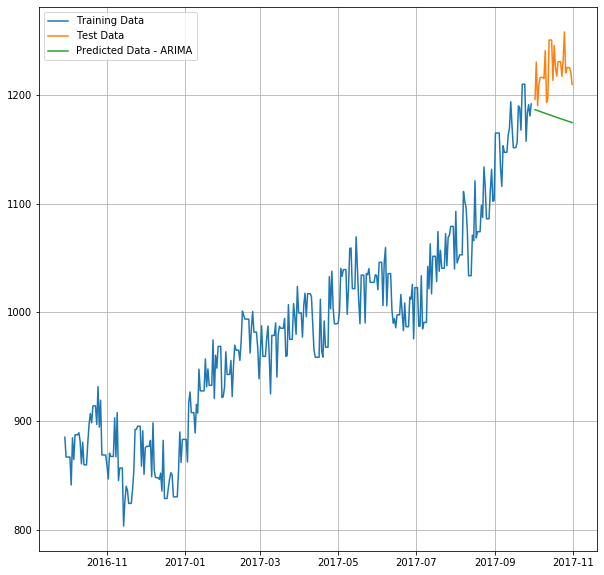

In [176]:
plt.figure(figsize=(10,10))
plt.plot(imp_Trainmodel['Stock_4'],label='Training Data')
plt.plot(df2_d['Stock_4'],label='Test Data')
plt.plot(df2_d['Stock_4'].index,pred_ARIMA4[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# Double Exponential Smoothing Method

In [177]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(imp_Trainmodel['Stock_1'],exponential='multiplicative')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.4130277690197893, 'smoothing_slope': 0.0, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 41.5085655103632, 'initial_slope': 1.0008773539799711, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [178]:
# Forecasting using this model for the duration of the test set
DES_predict1 =  model_DES.forecast(len(df2_d['Stock_1']))
DES_predict1

2017-09-30    56.521073
2017-10-01    56.570662
2017-10-02    56.620295
2017-10-03    56.669971
2017-10-04    56.719690
2017-10-05    56.769454
2017-10-06    56.819260
2017-10-07    56.869111
2017-10-08    56.919005
2017-10-09    56.968944
2017-10-10    57.018925
2017-10-11    57.068951
2017-10-12    57.119021
2017-10-13    57.169135
2017-10-14    57.219292
2017-10-15    57.269494
2017-10-16    57.319739
2017-10-17    57.370029
2017-10-18    57.420363
2017-10-19    57.470741
2017-10-20    57.521163
2017-10-21    57.571629
2017-10-22    57.622140
2017-10-23    57.672695
2017-10-24    57.723294
2017-10-25    57.773938
2017-10-26    57.824626
2017-10-27    57.875359
2017-10-28    57.926136
2017-10-29    57.976958
Freq: D, dtype: float64

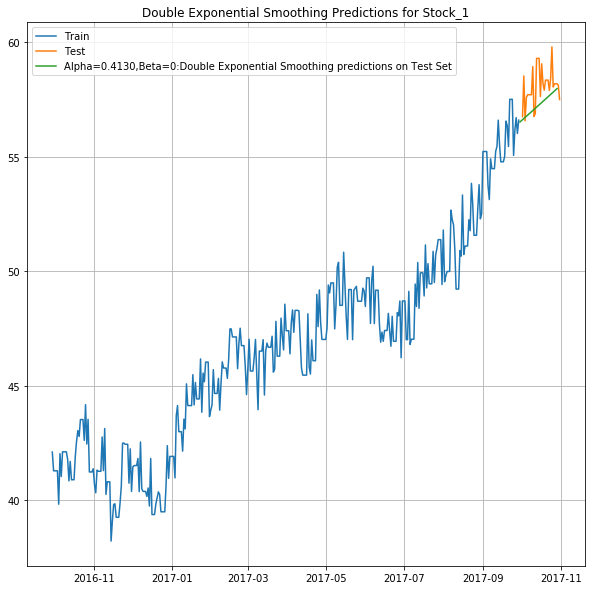

In [179]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(10,10))
plt.plot(imp_Trainmodel['Stock_1'],label='Train')
plt.plot(df2_d['Stock_1'], label='Test')
plt.plot(DES_predict1, label='Alpha=0.4130,Beta=0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions for Stock_1');


In [180]:
print('DES RMSE:',mean_squared_error(df2_d['Stock_1'].values,DES_predict1.values,squared=False))

DES RMSE: 1.1454020788549093


In [181]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(df2_d['Stock_1'].values,DES_predict1.values,squared=False)]}
                           ,index=['Alpha=0.413,Beta=0:DES'])

resultsDf_temp


Test RMSE
Alpha=0.413,Beta=0:DES   1.145402

# Stock_2

In [182]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(imp_Trainmodel['Stock_2'],exponential='multiplicative')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.4135516412850646, 'smoothing_slope': 0.0, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 547.2998302697703, 'initial_slope': 1.0008612158072485, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [183]:
# Forecasting using this model for the duration of the test set
DES_predict2 =  model_DES.forecast(len(df2_d['Stock_2']))
DES_predict2

2017-09-30    737.037606
2017-10-01    737.672355
2017-10-02    738.307650
2017-10-03    738.943492
2017-10-04    739.579882
2017-10-05    740.216820
2017-10-06    740.854306
2017-10-07    741.492342
2017-10-08    742.130926
2017-10-09    742.770061
2017-10-10    743.409747
2017-10-11    744.049983
2017-10-12    744.690771
2017-10-13    745.332110
2017-10-14    745.974002
2017-10-15    746.616446
2017-10-16    747.259444
2017-10-17    747.902996
2017-10-18    748.547102
2017-10-19    749.191762
2017-10-20    749.836978
2017-10-21    750.482750
2017-10-22    751.129077
2017-10-23    751.775961
2017-10-24    752.423403
2017-10-25    753.071402
2017-10-26    753.719959
2017-10-27    754.369074
2017-10-28    755.018749
2017-10-29    755.668983
Freq: D, dtype: float64

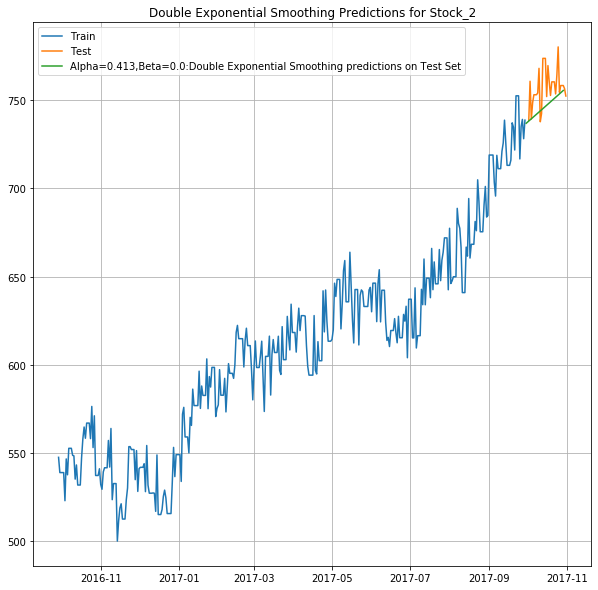

In [184]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(10,10))
plt.plot(imp_Trainmodel['Stock_2'],label='Train')
plt.plot(df2_d['Stock_2'], label='Test')
plt.plot(DES_predict2, label='Alpha=0.413,Beta=0.0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions for Stock_2');


In [185]:
print('DES RMSE:',mean_squared_error(df2_d['Stock_2'].values,DES_predict2.values,squared=False))

DES RMSE: 15.096306767665304


In [186]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(df2_d['Stock_2'].values,DES_predict2.values,squared=False)]}
                           ,index=['Alpha=0.413,Beta=0.0:DES'])

resultsDf_temp

Test RMSE
Alpha=0.413,Beta=0.0:DES  15.096307

# Stock_3

In [187]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(imp_Trainmodel['Stock_3'],exponential='multiplicative')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.4333103559094977, 'smoothing_slope': 0.0, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 256.5996248908978, 'initial_slope': 1.0008372724477288, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [188]:
# Forecasting using this model for the duration of the test set
DES_predict3 =  model_DES.forecast(len(df2_d['Stock_3']))
DES_predict3

2017-09-30    342.105123
2017-10-01    342.391558
2017-10-02    342.678233
2017-10-03    342.965148
2017-10-04    343.252303
2017-10-05    343.539699
2017-10-06    343.827336
2017-10-07    344.115213
2017-10-08    344.403331
2017-10-09    344.691690
2017-10-10    344.980291
2017-10-11    345.269134
2017-10-12    345.558218
2017-10-13    345.847544
2017-10-14    346.137113
2017-10-15    346.426924
2017-10-16    346.716978
2017-10-17    347.007274
2017-10-18    347.297814
2017-10-19    347.588597
2017-10-20    347.879623
2017-10-21    348.170893
2017-10-22    348.462407
2017-10-23    348.754165
2017-10-24    349.046167
2017-10-25    349.338414
2017-10-26    349.630905
2017-10-27    349.923642
2017-10-28    350.216623
2017-10-29    350.509850
Freq: D, dtype: float64

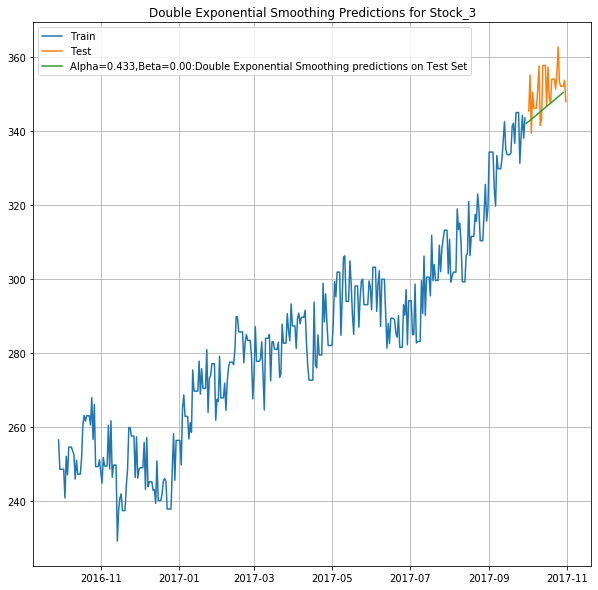

In [189]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(10,10))
plt.plot(imp_Trainmodel['Stock_3'],label='Train')
plt.plot(df2_d['Stock_3'], label='Test')
plt.plot(DES_predict3, label='Alpha=0.433,Beta=0.00:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions for Stock_3');

In [190]:
print('DES RMSE:',mean_squared_error(df2_d['Stock_3'].values,DES_predict3.values,squared=False))

DES RMSE: 7.123030777516017


In [191]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(df2_d['Stock_3'].values,DES_predict3.values,squared=False)]}
                           ,index=['Alpha=0.433,Beta=0.0:DES'])

resultsDf_temp

Test RMSE
Alpha=0.433,Beta=0.0:DES   7.123031

# Stock_4

In [192]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(imp_Trainmodel['Stock_4'],exponential='multiplicative',)
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.415791041926406, 'smoothing_slope': 0.0, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 885.0999014181517, 'initial_slope': 1.0008589317825984, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [193]:
# Forecasting using this model for the duration of the test set
DES_predict4 =  model_DES.forecast(len(df2_d['Stock_4']))
DES_predict4

2017-09-30    1189.631119
2017-10-01    1190.652931
2017-10-02    1191.675621
2017-10-03    1192.699189
2017-10-04    1193.723636
2017-10-05    1194.748963
2017-10-06    1195.775171
2017-10-07    1196.802260
2017-10-08    1197.830232
2017-10-09    1198.859086
2017-10-10    1199.888825
2017-10-11    1200.919447
2017-10-12    1201.950955
2017-10-13    1202.983349
2017-10-14    1204.016630
2017-10-15    1205.050798
2017-10-16    1206.085854
2017-10-17    1207.121800
2017-10-18    1208.158635
2017-10-19    1209.196361
2017-10-20    1210.234978
2017-10-21    1211.274487
2017-10-22    1212.314889
2017-10-23    1213.356185
2017-10-24    1214.398375
2017-10-25    1215.441461
2017-10-26    1216.485442
2017-10-27    1217.530320
2017-10-28    1218.576096
2017-10-29    1219.622769
Freq: D, dtype: float64

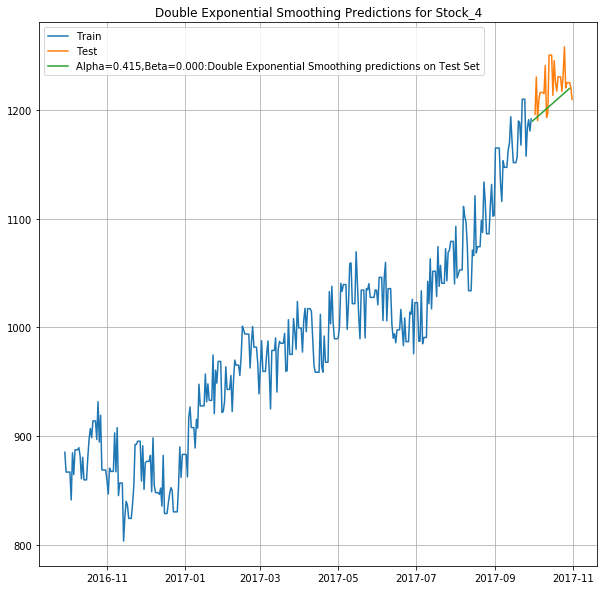

In [194]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(10,10))
plt.plot(imp_Trainmodel['Stock_4'],label='Train')
plt.plot(df2_d['Stock_4'], label='Test')
plt.plot(DES_predict4, label='Alpha=0.415,Beta=0.000:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions for Stock_4');

In [195]:
print('DES RMSE:',mean_squared_error(df2_d['Stock_4'].values,DES_predict4.values,squared=False))

DES RMSE: 24.978006694716623


In [196]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(df2_d['Stock_4'].values,DES_predict4.values,squared=False)]}
                           ,index=['Alpha=0.415,Beta=0.0:DES'])

resultsDf_temp

Test RMSE
Alpha=0.415,Beta=0.0:DES  24.978007

# Triple Exponential Method

# Stock_1

In [197]:

model_TES = ExponentialSmoothing(imp_Trainmodel['Stock_1'],trend='multiplicative',seasonal='multiplicative')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.4184654376352583, 'smoothing_slope': 9.786523221709214e-17, 'smoothing_seasonal': 4.872550493394864e-16, 'damping_slope': nan, 'initial_level': 46.7277331358588, 'initial_slope': 1.0008743986173465, 'initial_seasons': array([0.88966347, 0.88797862, 0.88723945, 0.88651322, 0.88750653,
       0.88597686, 0.89285904]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [198]:
# Forecasting using this model for the duration of the test set
TES_predict1 =  model_TES.forecast(len(df2_d['Stock_1']))
TES_predict1

2017-09-30    56.417006
2017-10-01    56.420118
2017-10-02    56.532724
2017-10-03    56.484633
2017-10-04    56.973174
2017-10-05    56.818904
2017-10-06    56.760888
2017-10-07    56.763230
2017-10-08    56.766361
2017-10-09    56.879658
2017-10-10    56.831272
2017-10-11    57.322811
2017-10-12    57.167595
2017-10-13    57.109223
2017-10-14    57.111578
2017-10-15    57.114729
2017-10-16    57.228721
2017-10-17    57.180038
2017-10-18    57.674593
2017-10-19    57.518425
2017-10-20    57.459694
2017-10-21    57.462065
2017-10-22    57.465234
2017-10-23    57.579926
2017-10-24    57.530945
2017-10-25    58.028535
2017-10-26    57.871408
2017-10-27    57.812317
2017-10-28    57.814702
2017-10-29    57.817891
Freq: D, dtype: float64

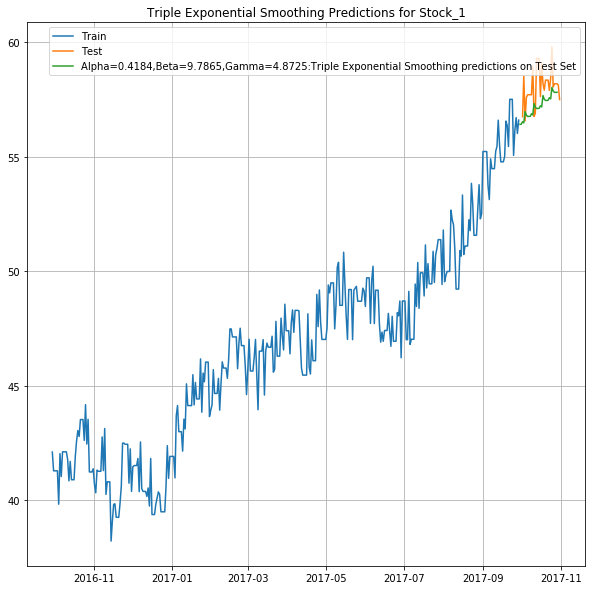

In [199]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(10,10))
plt.plot(imp_Trainmodel['Stock_1'], label='Train')
plt.plot(df2_d['Stock_1'], label='Test')

plt.plot(TES_predict1, label='Alpha=0.4184,Beta=9.7865,Gamma=4.8725:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions for Stock_1');

In [200]:
print('TES RMSE:',mean_squared_error(df2_d['Stock_1'].values,TES_predict1.values,squared=False))

TES RMSE: 1.1715953208467085


In [201]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(df2_d['Stock_1'].values,TES_predict1.values,squared=False)]}
                           ,index=['Alpha=0.4184,Beta=9.7865,Gamma=4.8725:TES'])

resultsDf_temp


Test RMSE
Alpha=0.4184,Beta=9.7865,Gamma=4.8725:TES   1.171595

# Stock_2 

In [202]:

model_TES = ExponentialSmoothing(imp_Trainmodel['Stock_2'],trend='multiplicative',seasonal='multiplicative')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.4161893484455353, 'smoothing_slope': 7.551027195772988e-10, 'smoothing_seasonal': 8.412160759910747e-10, 'damping_slope': nan, 'initial_level': 609.7928659800903, 'initial_slope': 1.0008750740535441, 'initial_seasons': array([0.88833909, 0.88669971, 0.88593558, 0.88521166, 0.88652145,
       0.8851686 , 0.89176401]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [203]:
# Forecasting using this model for the duration of the test set
TES_predict2 =  model_TES.forecast(len(df2_d['Stock_2']))
TES_predict2

2017-09-30    735.636736
2017-10-01    735.678833
2017-10-02    737.412099
2017-10-03    736.931096
2017-10-04    743.071658
2017-10-05    740.865553
2017-10-06    740.145446
2017-10-07    740.154739
2017-10-08    740.197094
2017-10-09    741.941006
2017-10-10    741.457049
2017-10-11    747.635324
2017-10-12    745.415670
2017-10-13    744.691140
2017-10-14    744.700490
2017-10-15    744.743106
2017-10-16    746.497728
2017-10-17    746.010798
2017-10-18    752.227018
2017-10-19    749.993732
2017-10-20    749.264752
2017-10-21    749.274160
2017-10-22    749.317037
2017-10-23    751.082435
2017-10-24    750.592515
2017-10-25    756.846912
2017-10-26    754.599910
2017-10-27    753.866453
2017-10-28    753.875919
2017-10-29    753.919059
Freq: D, dtype: float64

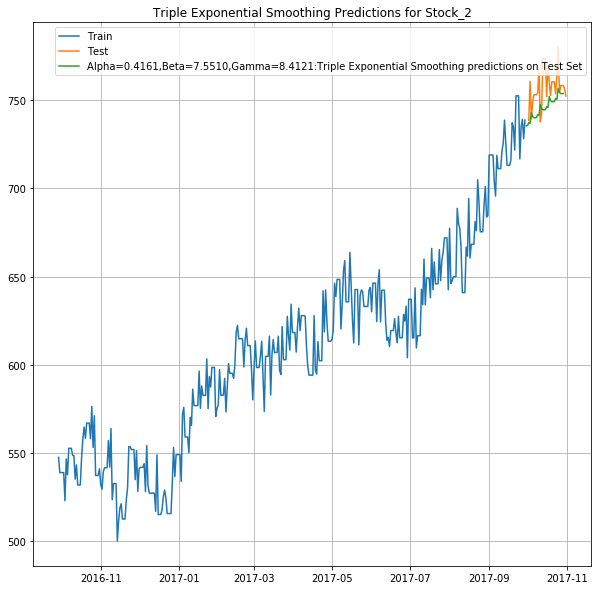

In [204]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(10,10))
plt.plot(imp_Trainmodel['Stock_2'], label='Train')
plt.plot(df2_d['Stock_2'], label='Test')

plt.plot(TES_predict2, label='Alpha=0.4161,Beta=7.5510,Gamma=8.4121:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions for Stock_2');

In [205]:
print('TES RMSE:',mean_squared_error(df2_d['Stock_2'].values,TES_predict2.values,squared=False))

TES RMSE: 15.2575555963736


In [206]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(df2_d['Stock_2'].values,TES_predict2.values,squared=False)]}
                           ,index=['Alpha=0.4161,Beta=7.5510,Gamma=8.4121:TES'])

resultsDf_temp

Test RMSE
Alpha=0.4161,Beta=7.5510,Gamma=8.4121:TES  15.257556

# Stock_3

In [207]:

model_TES = ExponentialSmoothing(imp_Trainmodel['Stock_3'],trend='multiplicative',seasonal='multiplicative')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.4315903204306438, 'smoothing_slope': 3.785743498846303e-09, 'smoothing_seasonal': 4.081398731444477e-09, 'damping_slope': nan, 'initial_level': 283.0235774848551, 'initial_slope': 1.0008633140631586, 'initial_seasons': array([0.89069553, 0.88928065, 0.88849682, 0.88778382, 0.88855113,
       0.88656691, 0.89386173]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [208]:
# Forecasting using this model for the duration of the test set
TES_predict3 =  model_TES.forecast(len(df2_d['Stock_3']))
TES_predict3

2017-09-30    341.552081
2017-10-01    341.572622
2017-10-02    342.162979
2017-10-03    341.693633
2017-10-04    344.802560
2017-10-05    343.877833
2017-10-06    343.627983
2017-10-07    343.621502
2017-10-08    343.642167
2017-10-09    344.236101
2017-10-10    343.763911
2017-10-11    346.891675
2017-10-12    345.961345
2017-10-13    345.709981
2017-10-14    345.703461
2017-10-15    345.724251
2017-10-16    346.321784
2017-10-17    345.846733
2017-10-18    348.993448
2017-10-19    348.057480
2017-10-20    347.804594
2017-10-21    347.798034
2017-10-22    347.818950
2017-10-23    348.420103
2017-10-24    347.942175
2017-10-25    351.107955
2017-10-26    350.166316
2017-10-27    349.911897
2017-10-28    349.905298
2017-10-29    349.926341
Freq: D, dtype: float64

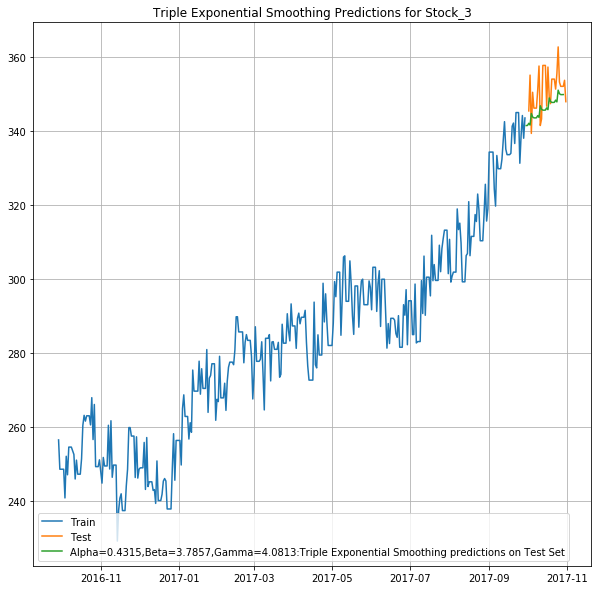

In [209]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(10,10))
plt.plot(imp_Trainmodel['Stock_3'], label='Train')
plt.plot(df2_d['Stock_3'], label='Test')

plt.plot(TES_predict3, label='Alpha=0.4315,Beta=3.7857,Gamma=4.0813:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions for Stock_3');

In [210]:
print('TES RMSE:',mean_squared_error(df2_d['Stock_3'].values,TES_predict3.values,squared=False))

TES RMSE: 7.19999695834294


In [211]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(df2_d['Stock_3'].values,TES_predict3.values,squared=False)]}
                           ,index=['Alpha=0.4179,Beta=2.7946,Gamma=5.3572:TES'])

resultsDf_temp

Test RMSE
Alpha=0.4179,Beta=2.7946,Gamma=5.3572:TES   7.199997

# Stock_4

In [212]:

model_TES = ExponentialSmoothing(imp_Trainmodel['Stock_4'],trend='multiplicative',seasonal='multiplicative')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.41797700315488795, 'smoothing_slope': 2.7946433115211424e-17, 'smoothing_seasonal': 5.3572531974629614e-17, 'damping_slope': nan, 'initial_level': 983.610205428309, 'initial_slope': 1.0008765236702215, 'initial_seasons': array([0.88825027, 0.88639818, 0.88565465, 0.88493009, 0.88643386,
       0.88487991, 0.89181615]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Saurabh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [213]:
# Forecasting using this model for the duration of the test set
TES_predict4 =  model_TES.forecast(len(df2_d['Stock_4']))
TES_predict4

2017-09-30    1187.259475
2017-10-01    1187.327972
2017-10-02    1190.388104
2017-10-03    1189.342877
2017-10-04    1199.716358
2017-10-05    1195.966721
2017-10-06    1194.519124
2017-10-07    1194.563286
2017-10-08    1194.632204
2017-10-09    1197.711161
2017-10-10    1196.659504
2017-10-11    1207.096801
2017-10-12    1203.324097
2017-10-13    1201.867595
2017-10-14    1201.912028
2017-10-15    1201.981371
2017-10-16    1205.079269
2017-10-17    1204.021142
2017-10-18    1214.522648
2017-10-19    1210.726734
2017-10-20    1209.261272
2017-10-21    1209.305979
2017-10-22    1209.375748
2017-10-23    1212.492704
2017-10-24    1211.428067
2017-10-25    1221.994177
2017-10-26    1218.174911
2017-10-27    1216.700434
2017-10-28    1216.745416
2017-10-29    1216.815614
Freq: D, dtype: float64

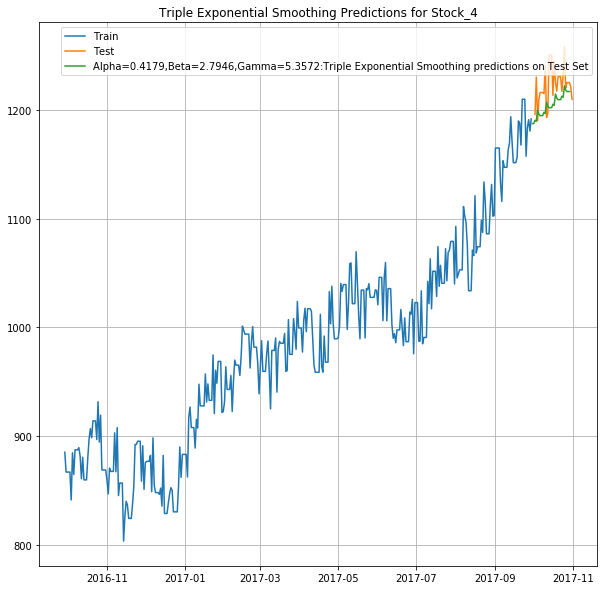

In [214]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(10,10))
plt.plot(imp_Trainmodel['Stock_4'], label='Train')
plt.plot(df2_d['Stock_4'], label='Test')

plt.plot(TES_predict4, label='Alpha=0.4179,Beta=2.7946,Gamma=5.3572:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions for Stock_4');

In [215]:
print('TES RMSE:',mean_squared_error(df2_d['Stock_4'].values,TES_predict4.values,squared=False))

TES RMSE: 25.13580461163512


In [216]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(df2_d['Stock_4'].values,TES_predict4.values,squared=False)]}
                           ,index=['Alpha=0.4179,Beta=2.7946,Gamma=5.3572:TES'])

resultsDf_temp

Test RMSE
Alpha=0.4179,Beta=2.7946,Gamma=5.3572:TES  25.135805

# Ensembles of Models

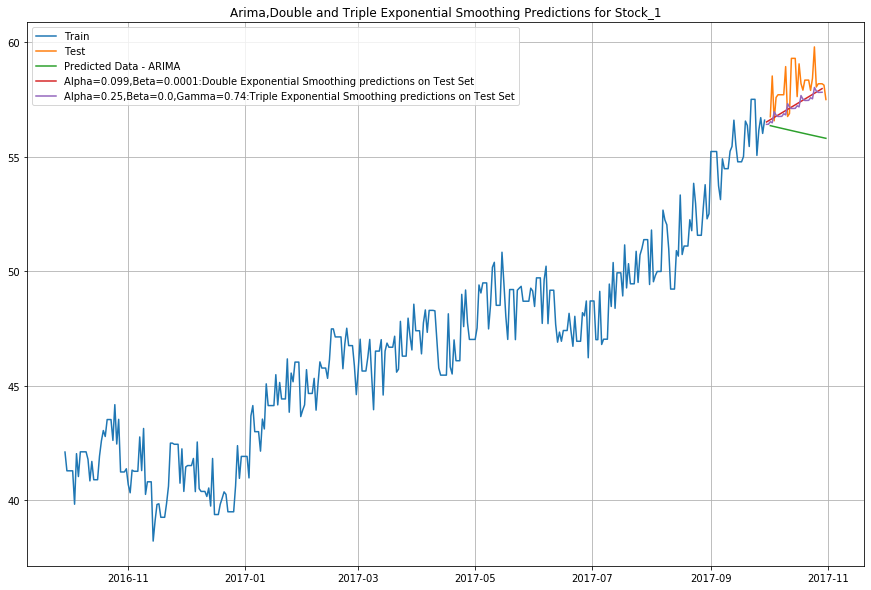

In [217]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15,10))
plt.plot(imp_Trainmodel['Stock_1'], label='Train')
plt.plot(df2_d['Stock_1'], label='Test')

plt.plot(df2_d['Stock_1'].index,pred_ARIMA1[0],label='Predicted Data - ARIMA')
plt.plot(DES_predict1, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict1, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.title('Arima,Double and Triple Exponential Smoothing Predictions for Stock_1');

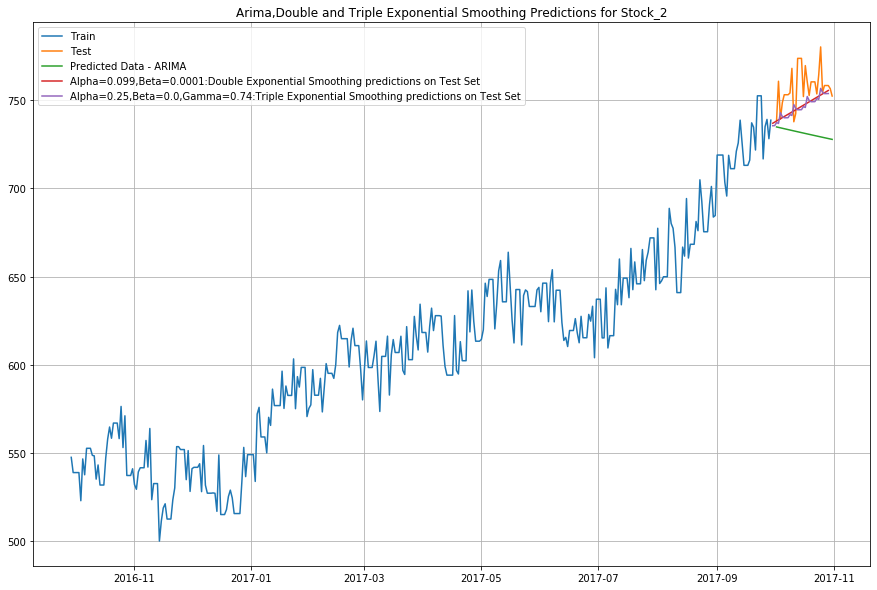

In [218]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15,10))
plt.plot(imp_Trainmodel['Stock_2'], label='Train')
plt.plot(df2_d['Stock_2'], label='Test')

plt.plot(df2_d['Stock_2'].index,pred_ARIMA2[0],label='Predicted Data - ARIMA')
plt.plot(DES_predict2, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict2, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.title('Arima,Double and Triple Exponential Smoothing Predictions for Stock_2');

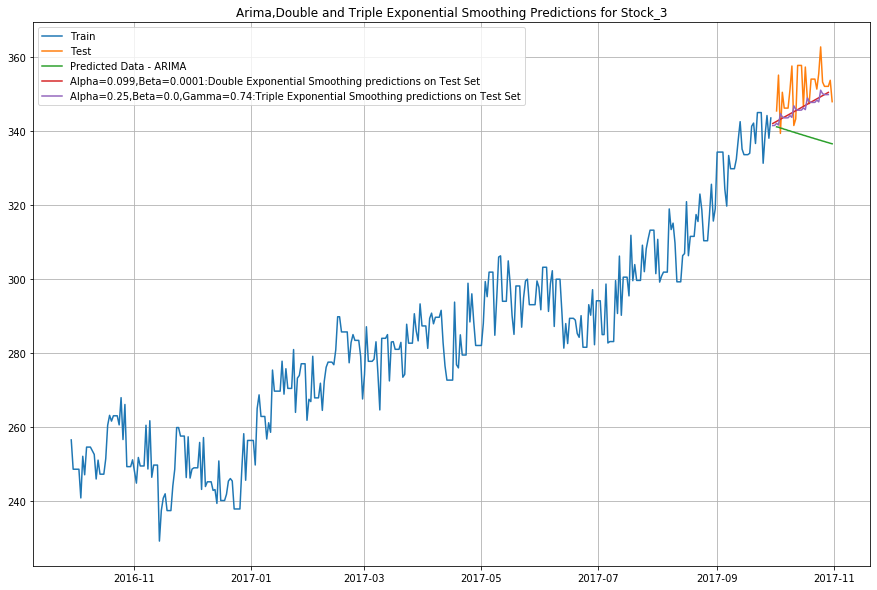

In [219]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15,10))
plt.plot(imp_Trainmodel['Stock_3'], label='Train')
plt.plot(df2_d['Stock_3'], label='Test')

plt.plot(df2_d['Stock_3'].index,pred_ARIMA3[0],label='Predicted Data - ARIMA')
plt.plot(DES_predict3, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict3, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.title('Arima,Double and Triple Exponential Smoothing Predictions for Stock_3');



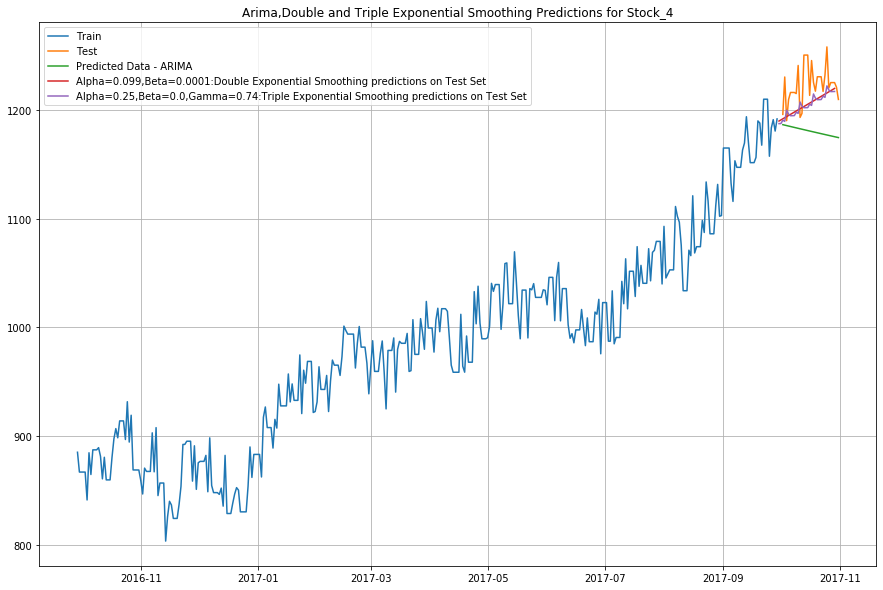

In [220]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15,10))
plt.plot(imp_Trainmodel['Stock_4'], label='Train')
plt.plot(df2_d['Stock_4'], label='Test')

plt.plot(df2_d['Stock_4'].index,pred_ARIMA4[0],label='Predicted Data - ARIMA')
plt.plot(DES_predict4, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict4, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.title('Arima,Double and Triple Exponential Smoothing Predictions for Stock_4');

# MOVING AVERAGE METHOD

# Stock_1

In [221]:
MovingAverage = imp_Trainmodel.copy()
MovingAverage.head()

Stock_1  Stock_2  Stock_3  Stock_4
Date                                          
2016-09-29    42.10   547.30   256.60   885.10
2016-09-30    41.28   538.64   248.68   866.88
2016-10-01    41.28   538.64   248.68   866.88
2016-10-02    41.28   538.64   248.68   866.88
2016-10-03    41.28   538.64   248.68   866.88

In [222]:
MovingAverage['Trailing_2'] = MovingAverage['Stock_1'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Stock_1'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Stock_1'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Stock_1'].rolling(9).mean()

MovingAverage.head()

Stock_1  Stock_2  Stock_3  Stock_4  Trailing_2  Trailing_4  \
Date                                                                     
2016-09-29    42.10   547.30   256.60   885.10         NaN         NaN   
2016-09-30    41.28   538.64   248.68   866.88       41.69         NaN   
2016-10-01    41.28   538.64   248.68   866.88       41.28         NaN   
2016-10-02    41.28   538.64   248.68   866.88       41.28      41.485   
2016-10-03    41.28   538.64   248.68   866.88       41.28      41.280   

            Trailing_6  Trailing_9  
Date                                
2016-09-29         NaN         NaN  
2016-09-30         NaN         NaN  
2016-10-01         NaN         NaN  
2016-10-02         NaN         NaN  
2016-10-03         NaN         NaN

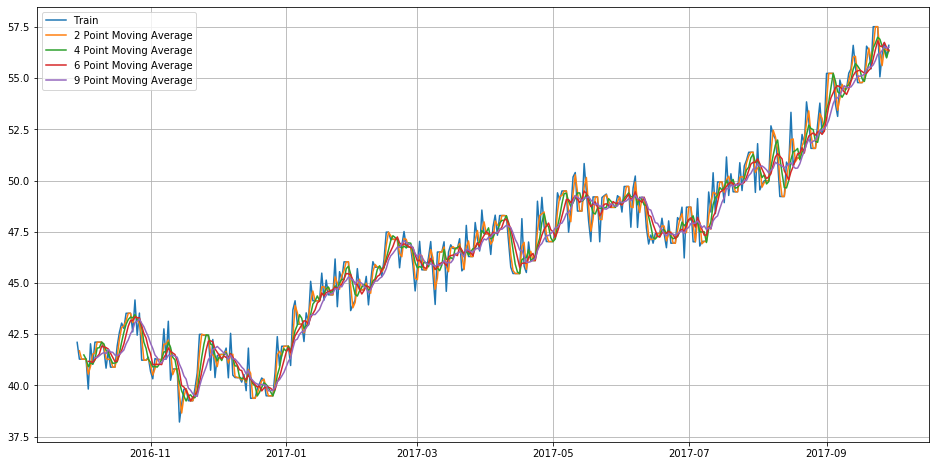

In [223]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Stock_1'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

# Checking Moving Averages for Only Test Data

In [224]:
MovingAveragetest1  = df2_d.copy()
MovingAveragetest1.head()

Stock_1  Stock_2  Stock_3  Stock_4
Date                                          
2017-10-02    56.75   738.75   345.50  1195.75
2017-10-03    58.53   760.89   355.18  1230.13
2017-10-04    56.57   739.41   339.42  1189.97
2017-10-05    57.59   748.67   350.54  1209.39
2017-10-06    57.71   753.23   346.26  1215.91

In [225]:
MovingAveragetest1['Trailing_2'] = MovingAveragetest1['Stock_1'].rolling(2).mean()
MovingAveragetest1['Trailing_4'] = MovingAveragetest1['Stock_1'].rolling(4).mean()
MovingAveragetest1['Trailing_6'] = MovingAveragetest1['Stock_1'].rolling(6).mean()
MovingAveragetest1['Trailing_9'] = MovingAveragetest1['Stock_1'].rolling(9).mean()

MovingAveragetest1.head()

Stock_1  Stock_2  Stock_3  Stock_4  Trailing_2  Trailing_4  \
Date                                                                     
2017-10-02    56.75   738.75   345.50  1195.75         NaN         NaN   
2017-10-03    58.53   760.89   355.18  1230.13       57.64         NaN   
2017-10-04    56.57   739.41   339.42  1189.97       57.55         NaN   
2017-10-05    57.59   748.67   350.54  1209.39       57.08       57.36   
2017-10-06    57.71   753.23   346.26  1215.91       57.65       57.60   

            Trailing_6  Trailing_9  
Date                                
2017-10-02         NaN         NaN  
2017-10-03         NaN         NaN  
2017-10-04         NaN         NaN  
2017-10-05         NaN         NaN  
2017-10-06         NaN         NaN

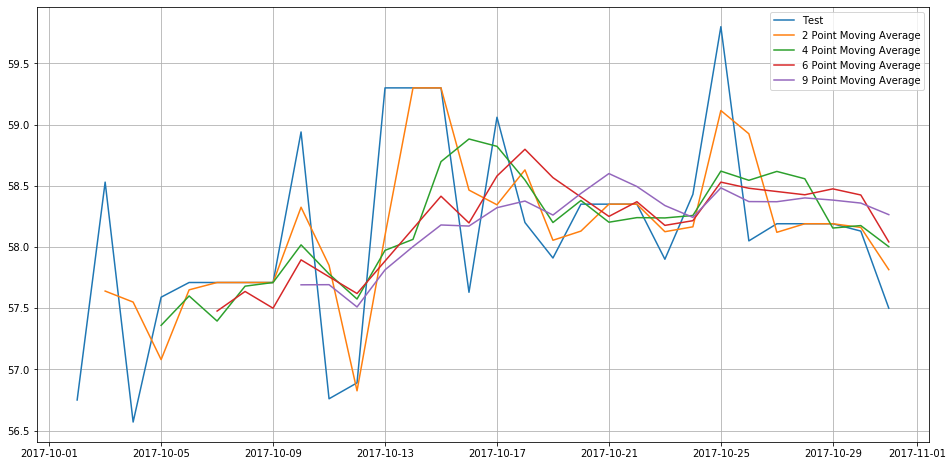

In [226]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAveragetest1['Stock_1'], label='Test')
plt.plot(MovingAveragetest1['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAveragetest1['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAveragetest1['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAveragetest1['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

# Stock_2

In [227]:
MovingAveragetest2  = df2_d.copy()
MovingAveragetest2.head()

Stock_1  Stock_2  Stock_3  Stock_4
Date                                          
2017-10-02    56.75   738.75   345.50  1195.75
2017-10-03    58.53   760.89   355.18  1230.13
2017-10-04    56.57   739.41   339.42  1189.97
2017-10-05    57.59   748.67   350.54  1209.39
2017-10-06    57.71   753.23   346.26  1215.91

In [228]:
MovingAveragetest2['Trailing_2'] = MovingAveragetest2['Stock_2'].rolling(2).mean()
MovingAveragetest2['Trailing_4'] = MovingAveragetest2['Stock_2'].rolling(4).mean()
MovingAveragetest2['Trailing_6'] = MovingAveragetest2['Stock_2'].rolling(6).mean()
MovingAveragetest2['Trailing_9'] = MovingAveragetest2['Stock_2'].rolling(9).mean()

MovingAveragetest2.head()

Stock_1  Stock_2  Stock_3  Stock_4  Trailing_2  Trailing_4  \
Date                                                                     
2017-10-02    56.75   738.75   345.50  1195.75         NaN         NaN   
2017-10-03    58.53   760.89   355.18  1230.13      749.82         NaN   
2017-10-04    56.57   739.41   339.42  1189.97      750.15         NaN   
2017-10-05    57.59   748.67   350.54  1209.39      744.04      746.93   
2017-10-06    57.71   753.23   346.26  1215.91      750.95      750.55   

            Trailing_6  Trailing_9  
Date                                
2017-10-02         NaN         NaN  
2017-10-03         NaN         NaN  
2017-10-04         NaN         NaN  
2017-10-05         NaN         NaN  
2017-10-06         NaN         NaN

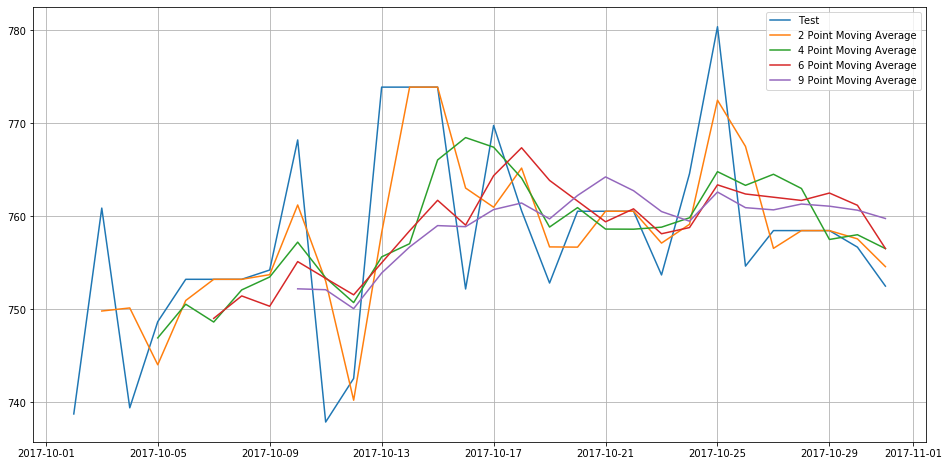

In [229]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAveragetest2['Stock_2'], label='Test')
plt.plot(MovingAveragetest2['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAveragetest2['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAveragetest2['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAveragetest2['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [230]:
MovingAveragetest3  = df2_d.copy()
MovingAveragetest3.head()

Stock_1  Stock_2  Stock_3  Stock_4
Date                                          
2017-10-02    56.75   738.75   345.50  1195.75
2017-10-03    58.53   760.89   355.18  1230.13
2017-10-04    56.57   739.41   339.42  1189.97
2017-10-05    57.59   748.67   350.54  1209.39
2017-10-06    57.71   753.23   346.26  1215.91

In [231]:
MovingAveragetest3['Trailing_2'] = MovingAveragetest3['Stock_3'].rolling(2).mean()
MovingAveragetest3['Trailing_4'] = MovingAveragetest3['Stock_3'].rolling(4).mean()
MovingAveragetest3['Trailing_6'] = MovingAveragetest3['Stock_3'].rolling(6).mean()
MovingAveragetest3['Trailing_9'] = MovingAveragetest3['Stock_3'].rolling(9).mean()

MovingAveragetest3.head()

Stock_1  Stock_2  Stock_3  Stock_4  Trailing_2  Trailing_4  \
Date                                                                     
2017-10-02    56.75   738.75   345.50  1195.75         NaN         NaN   
2017-10-03    58.53   760.89   355.18  1230.13      350.34         NaN   
2017-10-04    56.57   739.41   339.42  1189.97      347.30         NaN   
2017-10-05    57.59   748.67   350.54  1209.39      344.98      347.66   
2017-10-06    57.71   753.23   346.26  1215.91      348.40      347.85   

            Trailing_6  Trailing_9  
Date                                
2017-10-02         NaN         NaN  
2017-10-03         NaN         NaN  
2017-10-04         NaN         NaN  
2017-10-05         NaN         NaN  
2017-10-06         NaN         NaN

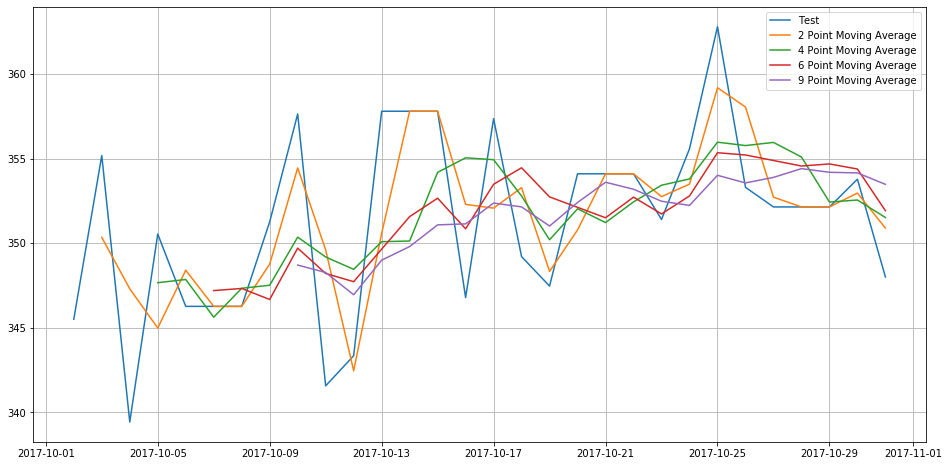

In [232]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAveragetest3['Stock_3'], label='Test')
plt.plot(MovingAveragetest3['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAveragetest3['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAveragetest3['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAveragetest3['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [233]:
MovingAveragetest4  = df2_d.copy()
MovingAveragetest4.head()

Stock_1  Stock_2  Stock_3  Stock_4
Date                                          
2017-10-02    56.75   738.75   345.50  1195.75
2017-10-03    58.53   760.89   355.18  1230.13
2017-10-04    56.57   739.41   339.42  1189.97
2017-10-05    57.59   748.67   350.54  1209.39
2017-10-06    57.71   753.23   346.26  1215.91

In [234]:
MovingAveragetest4['Trailing_2'] = MovingAveragetest4['Stock_4'].rolling(2).mean()
MovingAveragetest4['Trailing_4'] = MovingAveragetest4['Stock_4'].rolling(4).mean()
MovingAveragetest4['Trailing_6'] = MovingAveragetest4['Stock_4'].rolling(6).mean()
MovingAveragetest4['Trailing_9'] = MovingAveragetest4['Stock_4'].rolling(9).mean()

MovingAveragetest4.head()

Stock_1  Stock_2  Stock_3  Stock_4  Trailing_2  Trailing_4  \
Date                                                                     
2017-10-02    56.75   738.75   345.50  1195.75         NaN         NaN   
2017-10-03    58.53   760.89   355.18  1230.13     1212.94         NaN   
2017-10-04    56.57   739.41   339.42  1189.97     1210.05         NaN   
2017-10-05    57.59   748.67   350.54  1209.39     1199.68     1206.31   
2017-10-06    57.71   753.23   346.26  1215.91     1212.65     1211.35   

            Trailing_6  Trailing_9  
Date                                
2017-10-02         NaN         NaN  
2017-10-03         NaN         NaN  
2017-10-04         NaN         NaN  
2017-10-05         NaN         NaN  
2017-10-06         NaN         NaN

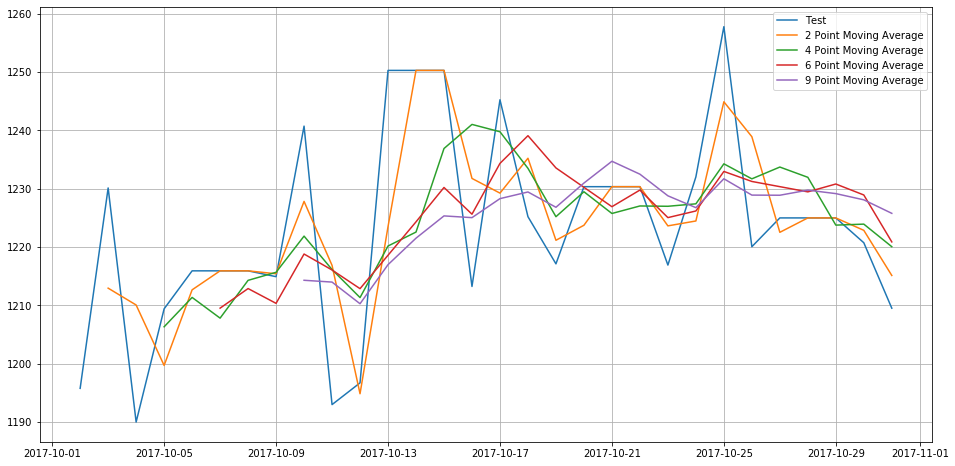

In [235]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAveragetest4['Stock_4'], label='Test')
plt.plot(MovingAveragetest4['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAveragetest4['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAveragetest4['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAveragetest4['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();